<a href="https://colab.research.google.com/github/SantiagoGGallardoP/Evaluaci-n/blob/main/A01734347_EVALUACI%C3%93N_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LEER ARCHIVOS:

In [76]:
df_españa= pd.read_csv('Girona_España.csv', encoding="unicode_escape")
df_españa.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,14551.0,https://www.airbnb.com/rooms/14551,2.023030e+13,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,...,4.91,4.63,4.74,HUTG-049542,f,1,0,1,0,0.37


In [77]:
df_eua= pd.read_csv('California_EUA.csv', encoding="unicode_escape")
df_eua.head(1)

,ï»¿id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31


In [78]:
df_mex= pd.read_csv('DF_Mexico.csv')
df_mex.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.0,4.86,NaN,f,3,3,0,0,0.19


#ELIMINAR VALORES NULOS:

##ESPAÑA:

In [79]:
df_españa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19655 non-null  float64
 1   listing_url                                   19655 non-null  object 
 2   scrape_id                                     19655 non-null  float64
 3   last_scraped                                  19655 non-null  object 
 4   source                                        19655 non-null  object 
 5   name                                          19655 non-null  object 
 6   description                                   19632 non-null  object 
 7   neighborhood_overview                         8342 non-null   object 
 8   picture_url                                   19655 non-null  object 
 9   host_id                                       19655 non-null 

In [80]:
with pd.option_context("display.max.rows", None, "display.max_columns", None):
  valores_nulos = df_españa.isnull().sum()
  print(valores_nulos)

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                        23
neighborhood_overview                           11313
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                         117
host_since                                        117
host_location                                    5559
host_about                                       8424
host_response_time                               2088
host_response_rate                               2088
host_acceptance_rate                             1153
host_is_superhost           

In [81]:
# Sustituir los valores nulos de las columnas float64 por la media de la columna
df_españa[df_españa.select_dtypes(include=['float64']).columns] \
  = df_españa.select_dtypes(include=['float64']).apply(lambda x: x.fillna(x.mean()))

# Sustituir los valores nulos de las columnas int64 por la media de la columna
df_españa[df_españa.select_dtypes(include=['int64']).columns] \
  = df_españa.select_dtypes(include=['int64']).apply(lambda x: x.fillna(x.mean()))

# Sustituir los valores nulos de las columnas object por la cadena 'omitido'
df_españa[df_españa.select_dtypes(include=['object']).columns] \
  = df_españa.select_dtypes(include=['object']).fillna('omitido')

#
df_españa["neighbourhood_group_cleansed"] = df_españa["neighbourhood_group_cleansed"].fillna("omitido")
df_españa["bathrooms"] = df_españa["bathrooms"].fillna(0)
df_españa["calendar_updated"] = df_españa["calendar_updated"].fillna(0)


##EUA:

In [82]:
df_eua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿id                                         6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [83]:
with pd.option_context("display.max.rows", None, "display.max_columns", None):
  valores_nulos = df_eua.isnull().sum()
  print(valores_nulos)

ï»¿id                                              0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                       47
neighborhood_overview                           2086
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   1221
host_about                                      2252
host_response_time                              1019
host_response_rate                              1019
host_acceptance_rate                             801
host_is_superhost                             

In [84]:
# Sustituir los valores nulos de las columnas float64 por la media de la columna
df_eua[df_eua.select_dtypes(include=['float64']).columns] \
  = df_eua.select_dtypes(include=['float64']).apply(lambda x: x.fillna(x.mean()))

# Sustituir los valores nulos de las columnas int64 por la media de la columna
df_eua[df_eua.select_dtypes(include=['int64']).columns] \
  = df_eua.select_dtypes(include=['int64']).apply(lambda x: x.fillna(x.mean()))

# Sustituir los valores nulos de las columnas object por la cadena 'omitido'
df_eua[df_eua.select_dtypes(include=['object']).columns] \
  = df_eua.select_dtypes(include=['object']).fillna('omitido')

#
df_eua["neighbourhood_group_cleansed"] = df_eua["neighbourhood_group_cleansed"].fillna("omitido")
df_eua["bathrooms"] = df_eua["bathrooms"].fillna(0)
df_eua["calendar_updated"] = df_eua["calendar_updated"].fillna(0)


##MEX:

In [85]:
df_mex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [86]:
with pd.option_context("display.max.rows", None, "display.max_columns", None):
  valores_nulos = df_mex.isnull().sum()
  print(valores_nulos)

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                1
description                                       928
neighborhood_overview                            9079
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                    5172
host_about                                      10664
host_response_time                               3091
host_response_rate                               3091
host_acceptance_rate                             2043
host_is_superhost           

In [87]:
# Sustituir los valores nulos de las columnas float64 por la media de la columna
df_mex[df_mex.select_dtypes(include=['float64']).columns] \
  = df_mex.select_dtypes(include=['float64']).apply(lambda x: x.fillna(x.mean()))

# Sustituir los valores nulos de las columnas int64 por la media de la columna
df_mex[df_mex.select_dtypes(include=['int64']).columns] \
  = df_mex.select_dtypes(include=['int64']).apply(lambda x: x.fillna(x.mean()))

# Sustituir los valores nulos de las columnas object por la cadena 'omitido'
df_mex[df_mex.select_dtypes(include=['object']).columns] \
  = df_mex.select_dtypes(include=['object']).fillna('omitido')

#
#df_mex["neighbourhood_group_cleansed"] = df_mex["neighbourhood_group_cleansed"].fillna("omitido")
#df_mex["license"] = df_mex["license"].fillna("omitido")
#df_mex["bathrooms"] = df_mex["bathrooms"].fillna(0)
#df_mex["calendar_updated"] = df_mex["calendar_updated"].fillna(0)


#RANGO INTERCUARTÍLICO PARA ELIMINAR VALORES NULOS


##ESPAÑA
**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**



In [88]:
#filtro numericas y categoricas
# Seleccionar las columnas numéricas
numericas_españa = df_españa.select_dtypes(include=['float64', 'int64'])
categoricas_españa = df_españa.select_dtypes(include=['object'])

In [89]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=numericas_españa

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                                              1.430535e+18
scrape_id                                       2.023030e+13
host_id                                         5.298792e+08
host_listings_count                             1.560000e+02
host_total_listings_count                       2.270000e+02
latitude                                        4.288548e+01
longitude                                       3.623007e+00
accommodates                                    9.000000e+00
bathrooms                                       0.000000e+00
bedrooms                                        4.500000e+00
beds                                            9.500000e+00
minimum_nights                                  1.100000e+01
maximum_nights                                  2.722500e+03
minimum_minimum_nights                          8.500000e+00
maximum_minimum_nights                          1.300000e+01
minimum_maximum_nights                          2.767500e+0

In [90]:
#Encontramos Outliers del Dataframe
outliers_iqr= numericas_españa[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#Obtenemos datos limpios del Dataframe
data_españa_iqr= numericas_españa[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_españa_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.455100e+04,2.023030e+13,57237,1.0,5.0,41.996500,2.836460,2.0,0.0,1.0,...,4.940000,4.890000,4.910000,4.63000,4.740000,1.0,0.0,NaN,0.0,0.3700
1,1.205757e+06,2.023030e+13,6586355,1.0,1.0,41.793040,2.774120,2.0,0.0,1.0,...,4.850000,4.850000,4.910000,4.69000,4.800000,1.0,0.0,NaN,0.0,0.5100
2,1.212820e+06,2.023030e+13,6620645,2.0,3.0,42.112840,3.166700,4.0,0.0,1.0,...,4.310000,4.810000,4.760000,4.74000,4.320000,2.0,2.0,0.0,0.0,0.6200
3,7.516380e+05,2.023030e+13,3680160,6.0,6.0,42.369580,2.980300,2.0,0.0,1.0,...,4.500000,4.860000,5.000000,4.63000,4.500000,6.0,1.0,NaN,0.0,0.0800
4,4.134200e+04,2.023030e+13,180072,2.0,3.0,42.346550,3.204630,4.0,0.0,1.0,...,4.820000,4.730000,4.730000,4.91000,4.360000,1.0,1.0,0.0,0.0,0.0900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,8.583870e+17,2.023030e+13,26281633,34.0,44.0,41.957265,3.201288,8.0,0.0,4.0,...,4.547288,4.701278,4.713507,4.72281,4.447319,34.0,34.0,0.0,0.0,0.5232
19651,8.583960e+17,2.023030e+13,444428600,3.0,3.0,41.699070,2.844080,4.0,0.0,1.0,...,4.547288,4.701278,4.713507,4.72281,4.447319,1.0,1.0,0.0,0.0,0.5232
19652,8.584110e+17,2.023030e+13,491503593,9.0,11.0,41.813720,3.064465,4.0,0.0,2.0,...,4.547288,4.701278,4.713507,4.72281,4.447319,9.0,9.0,0.0,0.0,0.5232
19653,8.584180e+17,2.023030e+13,389605038,111.0,121.0,41.809375,3.053910,4.0,0.0,2.0,...,4.547288,4.701278,4.713507,4.72281,4.447319,54.0,54.0,0.0,0.0,0.5232


In [92]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_españa_iqr.isnull().sum()
valores_nulos

id                                                 0
scrape_id                                          0
host_id                                            0
host_listings_count                             1682
host_total_listings_count                       2447
latitude                                           0
longitude                                        926
accommodates                                    1616
bathrooms                                          0
bedrooms                                        1355
beds                                             565
minimum_nights                                   449
maximum_nights                                     0
minimum_minimum_nights                           434
maximum_minimum_nights                          1009
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                           607
maximum_nights_avg_ntm                        

In [93]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_españa_iqr=data_españa_iqr.copy()
data_españa_iqr=data_españa_iqr.fillna(round(data_españa_iqr.mean(),1))
data_españa_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.455100e+04,2.023030e+13,57237,1.0,5.0,41.996500,2.836460,2.0,0.0,1.0,...,4.940000,4.890000,4.910000,4.63000,4.740000,1.0,0.0,0.0,0.0,0.3700
1,1.205757e+06,2.023030e+13,6586355,1.0,1.0,41.793040,2.774120,2.0,0.0,1.0,...,4.850000,4.850000,4.910000,4.69000,4.800000,1.0,0.0,0.0,0.0,0.5100
2,1.212820e+06,2.023030e+13,6620645,2.0,3.0,42.112840,3.166700,4.0,0.0,1.0,...,4.310000,4.810000,4.760000,4.74000,4.320000,2.0,2.0,0.0,0.0,0.6200
3,7.516380e+05,2.023030e+13,3680160,6.0,6.0,42.369580,2.980300,2.0,0.0,1.0,...,4.500000,4.860000,5.000000,4.63000,4.500000,6.0,1.0,0.0,0.0,0.0800
4,4.134200e+04,2.023030e+13,180072,2.0,3.0,42.346550,3.204630,4.0,0.0,1.0,...,4.820000,4.730000,4.730000,4.91000,4.360000,1.0,1.0,0.0,0.0,0.0900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,8.583870e+17,2.023030e+13,26281633,34.0,44.0,41.957265,3.201288,8.0,0.0,4.0,...,4.547288,4.701278,4.713507,4.72281,4.447319,34.0,34.0,0.0,0.0,0.5232
19651,8.583960e+17,2.023030e+13,444428600,3.0,3.0,41.699070,2.844080,4.0,0.0,1.0,...,4.547288,4.701278,4.713507,4.72281,4.447319,1.0,1.0,0.0,0.0,0.5232
19652,8.584110e+17,2.023030e+13,491503593,9.0,11.0,41.813720,3.064465,4.0,0.0,2.0,...,4.547288,4.701278,4.713507,4.72281,4.447319,9.0,9.0,0.0,0.0,0.5232
19653,8.584180e+17,2.023030e+13,389605038,111.0,121.0,41.809375,3.053910,4.0,0.0,2.0,...,4.547288,4.701278,4.713507,4.72281,4.447319,54.0,54.0,0.0,0.0,0.5232


In [94]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_españa_iqr.isnull().sum()
valores_nulos

id                                              0
scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
calendar_updated                                0


In [95]:
df_españa_concat_2 = pd.concat([data_españa_iqr, categoricas_españa], axis=1)
df_españa_concat_2.to_csv('España_IQR.csv', index=False)
df_españa_concat_2

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1.455100e+04,2.023030e+13,57237,1.0,5.0,41.996500,2.836460,2.0,0.0,1.0,...,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",$42.00,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,1.205757e+06,2.023030e+13,6586355,1.0,1.0,41.793040,2.774120,2.0,0.0,1.0,...,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",$47.00,t,31/03/2023,01/08/2013,26/06/2022,omitido,f
2,1.212820e+06,2.023030e+13,6620645,2.0,3.0,42.112840,3.166700,4.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",$74.00,t,01/04/2023,10/06/2013,30/12/2022,omitido,f
3,7.516380e+05,2.023030e+13,3680160,6.0,6.0,42.369580,2.980300,2.0,0.0,1.0,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",$45.00,t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
4,4.134200e+04,2.023030e+13,180072,2.0,3.0,42.346550,3.204630,4.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",$120.00,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,8.583870e+17,2.023030e+13,26281633,34.0,44.0,41.957265,3.201288,8.0,0.0,4.0,...,Entire home/apt,5 baths,"[""Pets allowed"", ""Smoking allowed"", ""Essentials""]",$209.00,t,01/04/2023,omitido,omitido,HUTG-001292,t
19651,8.583960e+17,2.023030e+13,444428600,3.0,3.0,41.699070,2.844080,4.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Kitchen"", ""Pets allowed"", ""Washer""]",$52.00,t,01/04/2023,omitido,omitido,HUTG019727,t
19652,8.584110e+17,2.023030e+13,491503593,9.0,11.0,41.813720,3.064465,4.0,0.0,2.0,...,Entire home/apt,1 bath,"[""Kitchen"", ""Free street parking"", ""Washer"", ""...",$66.00,t,01/04/2023,omitido,omitido,HUTG-057830,f
19653,8.584180e+17,2.023030e+13,389605038,111.0,121.0,41.809375,3.053910,4.0,0.0,2.0,...,Entire home/apt,1 bath,"[""Refrigerator"", ""Microwave"", ""Elevator"", ""Pet...",$108.00,t,01/04/2023,omitido,omitido,HUTG-065236,t


##EUA
**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**



In [96]:
#filtro numericas y categoricas
# Seleccionar las columnas numéricas
numericas_eua = df_eua.select_dtypes(include=['float64', 'int64'])
categoricas_eua = df_eua.select_dtypes(include=['object'])

In [97]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=numericas_eua

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido ï»¿id                                           1.067459e+08
scrape_id                                       2.020000e+13
host_id                                         4.243084e+08
host_listings_count                             3.850000e+01
host_total_listings_count                       5.700000e+01
latitude                                        3.783859e+01
longitude                                      -1.223622e+02
accommodates                                    7.000000e+00
bathrooms                                       0.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
minimum_nights                                  7.200000e+01
maximum_nights                                  2.769000e+03
minimum_minimum_nights                          7.200000e+01
maximum_minimum_nights                          7.200000e+01
minimum_maximum_nights                          2.677500e+0

In [98]:
#Encontramos Outliers del Dataframe
outliers_iqr= numericas_eua[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,8.180000e+17,NaN,495900269.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6932,8.180000e+17,NaN,499392537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6933,8.180000e+17,NaN,499294716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6934,8.180000e+17,NaN,485596413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#Obtenemos datos limpios del Dataframe
data_eua_iqr= numericas_eua[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_eua_iqr

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,2.020000e+13,1169.0,1.0,1.0,37.770280,-122.433170,3.0,0.0,1.0,...,4.920000,4.950000,4.880000,4.980000,4.760000,1.0,1.0,0.0,0.0,2.310000
1,5858.0,2.020000e+13,8904.0,2.0,2.0,37.744740,-122.420890,4.0,0.0,2.0,...,4.870000,4.890000,4.850000,4.770000,4.680000,1.0,1.0,0.0,0.0,0.660000
2,8142.0,2.020000e+13,21994.0,13.0,14.0,37.765550,-122.452130,1.0,0.0,1.0,...,4.440000,4.780000,4.780000,4.670000,4.670000,13.0,0.0,NaN,0.0,0.090000
3,8339.0,2.020000e+13,24215.0,2.0,6.0,37.775640,-122.436420,4.0,0.0,2.0,...,5.000000,4.940000,5.000000,4.940000,4.750000,2.0,2.0,0.0,0.0,0.170000
4,8739.0,2.020000e+13,7149.0,2.0,2.0,37.760300,-122.421970,3.0,0.0,1.0,...,4.940000,4.950000,4.960000,4.930000,4.740000,2.0,0.0,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,NaN,2.020000e+13,NaN,9.0,9.0,37.791994,-122.410000,2.0,0.0,1.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,5.0,5.0,0.0,0.0,1.318605
6932,NaN,2.020000e+13,NaN,1.0,1.0,37.763060,-122.432023,2.0,0.0,1.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,0.0,0.0,1.000000
6933,NaN,2.020000e+13,NaN,1.0,1.0,37.777633,-122.416478,1.0,0.0,1.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,1.0,0.0,1.0,0.0,1.318605
6934,NaN,2.020000e+13,NaN,3.0,4.0,37.738325,-122.396603,2.0,0.0,1.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,3.0,0.0,3.0,0.0,1.318605


In [100]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_eua_iqr.isnull().sum()
valores_nulos

ï»¿id                                           1573
scrape_id                                          0
host_id                                          413
host_listings_count                             1128
host_total_listings_count                       1196
latitude                                           0
longitude                                        327
accommodates                                     279
bathrooms                                          0
bedrooms                                         228
beds                                             558
minimum_nights                                   200
maximum_nights                                     4
minimum_minimum_nights                           231
maximum_minimum_nights                           346
minimum_maximum_nights                            21
maximum_maximum_nights                            36
minimum_nights_avg_ntm                           341
maximum_nights_avg_ntm                        

In [101]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_eua_iqr=data_eua_iqr.copy()
data_eua_iqr=data_eua_iqr.fillna(round(data_eua_iqr.mean(),1))
data_eua_iqr

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,2.020000e+13,1169.0,1.0,1.0,37.770280,-122.433170,3.0,0.0,1.0,...,4.920000,4.950000,4.880000,4.980000,4.760000,1.0,1.0,0.0,0.0,2.310000
1,5858.0,2.020000e+13,8904.0,2.0,2.0,37.744740,-122.420890,4.0,0.0,2.0,...,4.870000,4.890000,4.850000,4.770000,4.680000,1.0,1.0,0.0,0.0,0.660000
2,8142.0,2.020000e+13,21994.0,13.0,14.0,37.765550,-122.452130,1.0,0.0,1.0,...,4.440000,4.780000,4.780000,4.670000,4.670000,13.0,0.0,0.7,0.0,0.090000
3,8339.0,2.020000e+13,24215.0,2.0,6.0,37.775640,-122.436420,4.0,0.0,2.0,...,5.000000,4.940000,5.000000,4.940000,4.750000,2.0,2.0,0.0,0.0,0.170000
4,8739.0,2.020000e+13,7149.0,2.0,2.0,37.760300,-122.421970,3.0,0.0,1.0,...,4.940000,4.950000,4.960000,4.930000,4.740000,2.0,0.0,2.0,0.0,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,27790615.3,2.020000e+13,87507815.4,9.0,9.0,37.791994,-122.410000,2.0,0.0,1.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,5.0,5.0,0.0,0.0,1.318605
6932,27790615.3,2.020000e+13,87507815.4,1.0,1.0,37.763060,-122.432023,2.0,0.0,1.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,0.0,0.0,1.000000
6933,27790615.3,2.020000e+13,87507815.4,1.0,1.0,37.777633,-122.416478,1.0,0.0,1.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,1.0,0.0,1.0,0.0,1.318605
6934,27790615.3,2.020000e+13,87507815.4,3.0,4.0,37.738325,-122.396603,2.0,0.0,1.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,3.0,0.0,3.0,0.0,1.318605


In [102]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_eua_iqr.isnull().sum()
valores_nulos

ï»¿id                                           0
scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
calendar_updated                                0


In [103]:
df_eua_concat_2 = pd.concat([data_eua_iqr, categoricas_eua], axis=1)
df_eua_concat_2.to_csv('EUA_IQR.csv', index=False)
df_eua_concat_2

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,958.0,2.020000e+13,1169.0,1.0,1.0,37.770280,-122.433170,3.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$202.00,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5858.0,2.020000e+13,8904.0,2.0,2.0,37.744740,-122.420890,4.0,0.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",$235.00,t,06/03/2023,03/05/2009,06/08/2017,omitido,f
2,8142.0,2.020000e+13,21994.0,13.0,14.0,37.765550,-122.452130,1.0,0.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",$56.00,t,06/03/2023,08/09/2014,27/10/2022,omitido,f
3,8339.0,2.020000e+13,24215.0,2.0,6.0,37.775640,-122.436420,4.0,0.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",$575.00,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,8739.0,2.020000e+13,7149.0,2.0,2.0,37.760300,-122.421970,3.0,0.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",$110.00,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,27790615.3,2.020000e+13,87507815.4,9.0,9.0,37.791994,-122.410000,2.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",$164.00,t,06/03/2023,omitido,omitido,147904,t
6932,27790615.3,2.020000e+13,87507815.4,1.0,1.0,37.763060,-122.432023,2.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$228.00,t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f
6933,27790615.3,2.020000e+13,87507815.4,1.0,1.0,37.777633,-122.416478,1.0,0.0,1.0,...,Private room,1 shared bath,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",$104.00,t,06/03/2023,omitido,omitido,omitido,f
6934,27790615.3,2.020000e+13,87507815.4,3.0,4.0,37.738325,-122.396603,2.0,0.0,1.0,...,Private room,1 shared bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Centr...",$65.00,t,06/03/2023,omitido,omitido,2022-012562STR,f


##MEX
**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**



In [104]:
#filtro numericas y categoricas
# Seleccionar las columnas numéricas
numericas_mex = df_mex.select_dtypes(include=['float64', 'int64'])
categoricas_mex = df_mex.select_dtypes(include=['object'])

In [105]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=numericas_mex

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                                              1.690170e+18
scrape_id                                       2.023033e+13
host_id                                         6.839189e+08
host_listings_count                             2.850000e+01
host_total_listings_count                       3.200000e+01
neighbourhood_group_cleansed                             NaN
latitude                                        1.949915e+01
longitude                                      -9.911735e+01
accommodates                                    7.000000e+00
bathrooms                                                NaN
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
minimum_minimum_nights                          3.500000e+00
maximum_minimum_nights                          6.000000e+0

In [106]:
#Encontramos Outliers del Dataframe
outliers_iqr= numericas_mex[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.27178,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
#Obtenemos datos limpios del Dataframe
data_mex_iqr= numericas_mex[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_mex_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,20230329041210,10531228,3.0,7.0,NaN,19.353530,-99.162990,3.0,NaN,...,5.000000,4.950000,5.000000,4.860000,NaN,3.0,3.0,0.0,0.0,0.190000
1,2072354,20230329041210,16840050,3.0,3.0,NaN,19.353580,-99.169480,2.0,NaN,...,4.930000,5.000000,4.950000,4.840000,NaN,2.0,2.0,0.0,0.0,0.540000
2,696037,20230329041210,3531879,4.0,4.0,NaN,19.441800,-99.184020,6.0,NaN,...,4.920000,4.920000,NaN,4.710000,NaN,3.0,3.0,0.0,0.0,0.310000
3,35797,20230329041210,153786,1.0,1.0,NaN,19.382830,NaN,2.0,NaN,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,1.0,0.0,0.0,1.702435
4,44616,20230329041210,196253,16.0,16.0,NaN,19.411620,-99.177940,NaN,NaN,...,4.870000,4.780000,4.980000,4.480000,NaN,12.0,3.0,2.0,0.0,0.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,20230329041210,488030249,3.0,4.0,NaN,19.396663,-99.148145,2.0,NaN,...,4.827133,4.815533,4.832627,4.708674,NaN,2.0,2.0,0.0,0.0,1.702435
24220,853966732274073000,20230329041210,506816029,1.0,1.0,NaN,19.392023,-99.118722,7.0,NaN,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,1.0,0.0,0.0,1.702435
24221,854225071295768399,20230329041210,154670560,1.0,6.0,NaN,19.371088,-99.190186,2.0,NaN,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,0.0,1.0,0.0,1.702435
24222,854247693069190865,20230329041210,7799414,13.0,13.0,NaN,19.403792,-99.164978,2.0,NaN,...,4.827133,4.815533,4.832627,4.708674,NaN,13.0,13.0,0.0,0.0,1.702435


In [108]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_mex_iqr.isnull().sum()
valores_nulos

id                                                  0
scrape_id                                           0
host_id                                             0
host_listings_count                              3324
host_total_listings_count                        3453
neighbourhood_group_cleansed                    24224
latitude                                         1490
longitude                                        2594
accommodates                                     1090
bathrooms                                       24224
bedrooms                                          640
beds                                             2347
minimum_nights                                   3195
maximum_nights                                      1
minimum_minimum_nights                           3082
maximum_minimum_nights                           1895
minimum_maximum_nights                              5
maximum_maximum_nights                              6
minimum_nights_avg_ntm      

In [109]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_mex_iqr=data_mex_iqr.copy()
data_mex_iqr=data_mex_iqr.fillna(round(data_mex_iqr.mean(),1))
data_mex_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,20230329041210,10531228,3.0,7.0,NaN,19.353530,-99.162990,3.0,NaN,...,5.000000,4.950000,5.000000,4.860000,NaN,3.0,3.0,0.0,0.0,0.190000
1,2072354,20230329041210,16840050,3.0,3.0,NaN,19.353580,-99.169480,2.0,NaN,...,4.930000,5.000000,4.950000,4.840000,NaN,2.0,2.0,0.0,0.0,0.540000
2,696037,20230329041210,3531879,4.0,4.0,NaN,19.441800,-99.184020,6.0,NaN,...,4.920000,4.920000,4.900000,4.710000,NaN,3.0,3.0,0.0,0.0,0.310000
3,35797,20230329041210,153786,1.0,1.0,NaN,19.382830,-99.200000,2.0,NaN,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,1.0,0.0,0.0,1.702435
4,44616,20230329041210,196253,16.0,16.0,NaN,19.411620,-99.177940,2.9,NaN,...,4.870000,4.780000,4.980000,4.480000,NaN,12.0,3.0,2.0,0.0,0.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,20230329041210,488030249,3.0,4.0,NaN,19.396663,-99.148145,2.0,NaN,...,4.827133,4.815533,4.832627,4.708674,NaN,2.0,2.0,0.0,0.0,1.702435
24220,853966732274073000,20230329041210,506816029,1.0,1.0,NaN,19.392023,-99.118722,7.0,NaN,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,1.0,0.0,0.0,1.702435
24221,854225071295768399,20230329041210,154670560,1.0,6.0,NaN,19.371088,-99.190186,2.0,NaN,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,0.0,1.0,0.0,1.702435
24222,854247693069190865,20230329041210,7799414,13.0,13.0,NaN,19.403792,-99.164978,2.0,NaN,...,4.827133,4.815533,4.832627,4.708674,NaN,13.0,13.0,0.0,0.0,1.702435


In [110]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_mex_iqr.isnull().sum()
valores_nulos

id                                                  0
scrape_id                                           0
host_id                                             0
host_listings_count                                 0
host_total_listings_count                           0
neighbourhood_group_cleansed                    24224
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                       24224
bedrooms                                            0
beds                                                0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights                              0
minimum_nights_avg_ntm      

In [111]:
df_mex_concat_2 = pd.concat([data_mex_iqr, categoricas_mex], axis=1)
df_mex_concat_2.to_csv('Mex_IQR.csv', index=False)
df_mex_concat_2

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,2056638,20230329041210,10531228,3.0,7.0,NaN,19.353530,-99.162990,3.0,NaN,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",t,2023-03-30,2014-01-03,2018-06-24,f
1,2072354,20230329041210,16840050,3.0,3.0,NaN,19.353580,-99.169480,2.0,NaN,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,t,2023-03-30,2014-01-01,2022-11-04,f
2,696037,20230329041210,3531879,4.0,4.0,NaN,19.441800,-99.184020,6.0,NaN,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,2023-03-29,2012-10-31,2022-12-21,f
3,35797,20230329041210,153786,1.0,1.0,NaN,19.382830,-99.200000,2.0,NaN,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...","$3,658.00",t,2023-03-29,omitido,omitido,f
4,44616,20230329041210,196253,16.0,16.0,NaN,19.411620,-99.177940,2.9,NaN,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...","$18,000.00",t,2023-03-30,2011-11-09,2023-03-26,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,20230329041210,488030249,3.0,4.0,NaN,19.396663,-99.148145,2.0,NaN,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",$760.00,t,2023-03-30,omitido,omitido,f
24220,853966732274073000,20230329041210,506816029,1.0,1.0,NaN,19.392023,-99.118722,7.0,NaN,...,Entire rental unit,Entire home/apt,1 bath,"[""Lake access"", ""Ski-in/Ski-out"", ""Wifi"", ""Out...","$1,520.00",t,2023-03-29,omitido,omitido,t
24221,854225071295768399,20230329041210,154670560,1.0,6.0,NaN,19.371088,-99.190186,2.0,NaN,...,Private room in home,Private room,2.5 shared baths,"[""Luggage dropoff allowed"", ""Shared patio or b...",$533.00,t,2023-03-29,omitido,omitido,f
24222,854247693069190865,20230329041210,7799414,13.0,13.0,NaN,19.403792,-99.164978,2.0,NaN,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...","$1,200.00",t,2023-03-30,omitido,omitido,t


#EXTRACCIÓN DE DATOS:

##ESPAÑA:

In [112]:
df_españa_concat_2 = df_españa_concat_2[df_españa_concat_2["host_acceptance_rate"] != "omitido"]

df_españa_concat_2["host_acceptance_rate"] = df_españa_concat_2["host_acceptance_rate"].replace("sin registro", "5%")
df_españa_concat_2['host_acceptance_rate'] = pd.to_numeric(df_españa_concat_2['host_acceptance_rate'].str.replace('%', ''))
datosa_españa = df_españa_concat_2[df_españa_concat_2["host_acceptance_rate"] > 50]
datosa_españa

<ipython-input-112-b58fb1f3fff9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_españa_concat_2["host_acceptance_rate"] = df_españa_concat_2["host_acceptance_rate"].replace("sin registro", "5%")
<ipython-input-112-b58fb1f3fff9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_españa_concat_2['host_acceptance_rate'] = pd.to_numeric(df_españa_concat_2['host_acceptance_rate'].str.replace('%', ''))


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1.455100e+04,2.023030e+13,57237,1.0,5.0,41.996500,2.836460,2.0,0.0,1.0,...,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",$42.00,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
2,1.212820e+06,2.023030e+13,6620645,2.0,3.0,42.112840,3.166700,4.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",$74.00,t,01/04/2023,10/06/2013,30/12/2022,omitido,f
3,7.516380e+05,2.023030e+13,3680160,6.0,6.0,42.369580,2.980300,2.0,0.0,1.0,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",$45.00,t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
5,7.519970e+05,2.023030e+13,3387407,12.0,12.0,41.917980,3.164190,4.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Pack ’n play/Travel crib...",$105.00,t,01/04/2023,03/05/2016,26/02/2023,HUTG-016218,t
6,7.520350e+05,2.023030e+13,3387407,12.0,12.0,41.918010,3.170850,4.0,0.0,2.0,...,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",$110.00,t,31/03/2023,02/07/2013,31/10/2021,HUTG-008974,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19647,8.583550e+17,2.023030e+13,497533696,25.0,26.0,41.999060,3.194850,5.0,0.0,3.0,...,Entire home/apt,2 baths,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",$136.00,t,01/04/2023,omitido,omitido,HUTG-037880,t
19648,8.583610e+17,2.023030e+13,13308911,51.0,59.0,41.720360,2.929860,4.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",$107.00,t,01/04/2023,omitido,omitido,HUTG-027601,t
19650,8.583870e+17,2.023030e+13,26281633,34.0,44.0,41.957265,3.201288,8.0,0.0,4.0,...,Entire home/apt,5 baths,"[""Pets allowed"", ""Smoking allowed"", ""Essentials""]",$209.00,t,01/04/2023,omitido,omitido,HUTG-001292,t
19651,8.583960e+17,2.023030e+13,444428600,3.0,3.0,41.699070,2.844080,4.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Kitchen"", ""Pets allowed"", ""Washer""]",$52.00,t,01/04/2023,omitido,omitido,HUTG019727,t


In [113]:
datosb_españa = df_españa_concat_2[df_españa_concat_2["host_is_superhost"] == "t"]
datosb_españa

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1.455100e+04,2.023030e+13,57237,1.0,5.0,41.996500,2.836460,2.0,0.0,1.0,...,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",$42.00,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
8,4.540000e+04,2.023030e+13,201228,1.0,2.0,41.955770,3.210960,4.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Washer"", ""E...",$83.00,t,01/04/2023,28/12/2010,04/03/2023,HUTG-015895,t
10,7.536040e+05,2.023030e+13,3964191,7.0,7.0,41.717300,2.864090,6.0,0.0,3.0,...,Entire home/apt,1 bath,"[""Carbon monoxide alarm"", ""Free parking on pre...",$195.00,t,01/04/2023,08/09/2013,03/09/2022,LLG-000010,f
21,1.067040e+05,2.023030e+13,553059,5.0,10.0,41.836310,2.937000,5.0,0.0,4.0,...,Entire home/apt,4.5 baths,"[""Dedicated workspace"", ""Kitchen"", ""Self check...",$231.00,t,01/04/2023,19/07/2011,31/12/2022,PG-002599,f
23,7.667630e+05,2.023030e+13,4043268,2.0,2.0,41.960410,3.226590,5.0,0.0,2.2,...,Entire home/apt,3 baths,"[""Carbon monoxide alarm"", ""Free parking on pre...",$399.00,t,01/04/2023,04/06/2016,16/10/2022,HUTG-043628,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19597,8.570060e+17,2.023030e+13,137859766,15.0,25.0,42.290870,3.276400,6.0,0.0,3.0,...,Entire home/apt,3 baths,"[""Air conditioning"", ""Free parking on premises...",$341.00,t,01/04/2023,omitido,omitido,HUTG-060488,t
19601,8.561710e+17,2.023030e+13,401533317,5.0,5.0,42.054270,3.206850,6.0,0.0,3.0,...,Entire home/apt,1.5 baths,"[""Refrigerator"", ""Microwave"", ""Safe"", ""Free st...",$230.00,t,01/04/2023,omitido,omitido,HUTG-059959,f
19617,8.571400e+17,2.023030e+13,225125698,19.0,19.0,42.291029,3.278916,4.0,0.0,2.0,...,Entire home/apt,1 bath,"[""Dedicated workspace"", ""Kitchen"", ""Air condit...",$170.00,t,31/03/2023,omitido,omitido,HUTG-060928,t
19628,8.576970e+17,2.023030e+13,125660503,10.0,13.0,41.787850,3.028690,6.0,0.0,3.0,...,Entire home/apt,2 baths,"[""Air conditioning"", ""Free parking on premises...",$207.00,t,01/04/2023,omitido,omitido,HUTG-067564,t


In [114]:
datosc_españa = df_españa_concat_2[df_españa_concat_2["host_identity_verified"] == "f"]
datosc_españa

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,1.212820e+06,2.023030e+13,6620645,2.0,3.0,42.11284,3.166700,4.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",$74.00,t,01/04/2023,10/06/2013,30/12/2022,omitido,f
9,1.222762e+06,2.023030e+13,6404885,1.0,1.0,42.21904,2.907440,5.0,0.0,3.0,...,Entire home/apt,2 baths,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wa...",$65.00,t,31/03/2023,19/08/2013,14/09/2022,HUTG-012585,f
33,1.242933e+06,2.023030e+13,6774688,1.0,2.0,41.85578,3.130430,4.0,0.0,2.0,...,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Oven"", ""Dis...",$100.00,t,01/04/2023,02/08/2013,29/07/2019,HUTG-019098,f
48,8.103730e+05,2.023030e+13,4261656,1.0,1.0,42.24734,3.197300,4.0,0.0,2.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",$117.00,t,01/04/2023,20/02/2014,13/11/2022,HUTG-016748,t
52,1.261832e+06,2.023030e+13,6872077,1.0,1.0,41.72438,2.930100,4.0,0.0,2.0,...,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Washer"", ""P...",$100.00,t,01/04/2023,16/08/2015,24/08/2017,omitido,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19553,8.564530e+17,2.023030e+13,5113430,4.0,11.0,41.81861,3.056453,4.0,0.0,2.0,...,Entire home/apt,1.5 baths,"[""Air conditioning"", ""Stainless steel oven"", ""...",$182.00,t,01/04/2023,omitido,omitido,HUTG-029538,f
19560,8.555490e+17,2.023030e+13,167394031,1.0,1.0,41.69185,2.812790,8.0,0.0,4.0,...,Entire home/apt,3 baths,"[""Free parking on premises"", ""Refrigerator"", ""...",$134.00,t,01/04/2023,omitido,omitido,HUTG002307,t
19561,8.564900e+17,2.023030e+13,450603533,30.0,30.0,42.26445,3.179300,5.0,0.0,2.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",$168.00,t,01/04/2023,omitido,omitido,HUTG-023155,t
19611,8.571160e+17,2.023030e+13,503009347,14.0,14.0,41.79450,3.043490,7.0,0.0,3.0,...,Entire home/apt,2 baths,"[""Iron"", ""Ethernet connection"", ""Single level ...",$161.00,t,01/04/2023,omitido,omitido,HUTG-008448,t


In [115]:
datosd_españa = df_españa_concat_2[df_españa_concat_2["property_type"].isin(["Private room", "Hotel room"])]
datosd_españa

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
356,3.054347e+06,2.023030e+13,15550598,2.0,2.0,42.28732,3.277130,2.0,0.0,2.499739,...,Private room,1 private bath,"[""Air conditioning"", ""Refrigerator"", ""Shampoo""...",$109.00,t,01/04/2023,16/06/2014,05/11/2022,HUTG-002595,f
3134,1.711768e+07,2.023030e+13,104655629,10.0,10.0,42.14480,2.568480,2.0,0.0,1.000000,...,Private room,1 private bath,"[""Pool"", ""Pets allowed"", ""Hangers"", ""Heating"",...",$73.00,t,31/03/2023,25/02/2017,05/12/2022,ATG-000023,f
7838,3.299717e+07,2.023030e+13,248354355,1.0,3.0,42.15973,2.911320,2.0,0.0,1.000000,...,Private room,1 bath,"[""Sanex body soap"", ""Microwave"", ""First aid ki...",$40.00,t,31/03/2023,16/08/2020,22/08/2022,Exempt,f
16665,6.583050e+17,2.023030e+13,466301894,1.0,1.0,41.72831,2.919324,2.0,0.0,1.000000,...,Private room,1.5 baths,"[""Carbon monoxide alarm"", ""Refrigerator"", ""Lon...",$50.00,t,01/04/2023,17/07/2022,22/07/2022,HUTB-123456,t
17057,6.867380e+17,2.023030e+13,104927492,1.0,5.0,42.18328,2.886740,2.0,0.0,1.000000,...,Private room,1 private bath,"[""Free parking on premises"", ""Shared outdoor p...",$120.00,t,31/03/2023,omitido,omitido,Exempt,f
19022,8.412090e+17,2.023030e+13,162348326,2.0,2.0,42.30333,3.000000,2.0,0.0,1.000000,...,Private room,1 private bath,"[""Clothing storage: walk-in closet"", ""Pack ’n ...",$80.00,t,01/04/2023,omitido,omitido,Exempt,t


In [116]:
#filtroe
#cambiar Half-bath, Shared half-bath, Private half-bath, sin registro
df_españa_concat_2["bathrooms_text"] = df_españa_concat_2["bathrooms_text"].str.replace('Half-bath', '0.5').str.replace('Shared half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('sin registro', '0')
#se extraen los numeros y se guardan como string en la misma columna
df_españa_concat_2["bathrooms_text"] = df_españa_concat_2["bathrooms_text"].str.extract('(\d+\.?\d*)', expand=False)
#cambiar columna a float
df_españa_concat_2["bathrooms_text"] = df_españa_concat_2["bathrooms_text"].astype(float)

datose_españa = df_españa_concat_2[df_españa_concat_2["bathrooms_text"] > 1]
datose_españa

<ipython-input-116-7562bbbe9dae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_españa_concat_2["bathrooms_text"] = df_españa_concat_2["bathrooms_text"].str.replace('Half-bath', '0.5').str.replace('Shared half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('sin registro', '0')
<ipython-input-116-7562bbbe9dae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_españa_concat_2["bathrooms_text"] = df_españa_concat_2["bathrooms_text"].str.extract('(\d+\.?\d*)', expand=False)
<ipython-in

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
1,1.205757e+06,2.023030e+13,6586355,1.0,1.0,41.793040,2.774120,2.0,0.0,1.0,...,Private room,1.5,"[""Free parking on premises"", ""Refrigerator"", ""...",$47.00,t,31/03/2023,01/08/2013,26/06/2022,omitido,f
9,1.222762e+06,2.023030e+13,6404885,1.0,1.0,42.219040,2.907440,5.0,0.0,3.0,...,Entire home/apt,2.0,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wa...",$65.00,t,31/03/2023,19/08/2013,14/09/2022,HUTG-012585,f
11,4.876400e+04,2.023030e+13,220145,1.0,2.0,42.176050,3.039740,8.0,0.0,4.0,...,Entire home/apt,2.0,"[""Refrigerator"", ""Long term stays allowed"", ""S...",$120.00,t,31/03/2023,04/06/2011,13/08/2022,HUTG-000207,f
14,1.228453e+06,2.023030e+13,6623729,1.0,1.0,42.242870,3.205620,5.0,0.0,2.0,...,Entire home/apt,2.0,"[""Beach essentials"", ""Board games"", ""Carbon mo...",$114.00,t,01/04/2023,12/05/2018,01/01/2023,HUTG-031144,t
15,9.334300e+04,2.023030e+13,477826,4.0,6.0,42.104050,3.149360,7.0,0.0,3.0,...,Entire home/apt,2.0,"[""Air conditioning"", ""Free parking on premises...",$173.00,t,01/04/2023,omitido,omitido,HUTG-001447,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19640,8.578870e+17,2.023030e+13,50260338,19.0,37.0,41.861063,3.076089,5.0,0.0,2.0,...,Entire home/apt,2.0,"[""Free parking on premises"", ""Refrigerator"", ""...",$129.00,t,01/04/2023,omitido,omitido,HUTG-016723,t
19641,8.579310e+17,2.023030e+13,173153149,51.0,74.0,41.701663,2.870586,6.0,0.0,3.0,...,Entire home/apt,3.0,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",$440.00,t,01/04/2023,omitido,omitido,HUTG-023596,t
19643,8.579870e+17,2.023030e+13,419014196,1.0,2.0,42.366939,3.161534,5.0,0.0,2.0,...,Entire home/apt,2.5,"[""Air conditioning"", ""Beach essentials"", ""Boar...",$100.00,t,01/04/2023,omitido,omitido,Exempt,f
19647,8.583550e+17,2.023030e+13,497533696,25.0,26.0,41.999060,3.194850,5.0,0.0,3.0,...,Entire home/apt,2.0,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",$136.00,t,01/04/2023,omitido,omitido,HUTG-037880,t


In [117]:
df_españa_concat_2["price"] = df_españa_concat_2["price"].str.replace(',', '').str.replace('$', '').astype(float)
datosf_españa = df_españa_concat_2[(df_españa_concat_2["price"] > 10000) & (df_españa_concat_2["room_type"] == "Entire home/apt")]
datosf_españa

<ipython-input-117-ad82456b3e08>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_españa_concat_2["price"] = df_españa_concat_2["price"].str.replace(',', '').str.replace('$', '').astype(float)
<ipython-input-117-ad82456b3e08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_españa_concat_2["price"] = df_españa_concat_2["price"].str.replace(',', '').str.replace('$', '').astype(float)


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
753,4682669.0,2.023030e+13,24213114,2.0,2.0,42.053955,3.162875,5.0,0.0,2.2,...,Entire home/apt,8.0,"[""Beach essentials"", ""Board games"", ""Free park...",12986.0,t,01/04/2023,28/12/2015,26/12/2022,PG-000878,f
1840,11716662.0,2.023030e+13,10222076,1.0,1.0,41.892130,3.184600,4.0,0.0,3.0,...,Entire home/apt,1.5,"[""Changing table"", ""Fireplace guards"", ""Pack ’...",14500.0,t,01/04/2023,14/07/2016,28/08/2022,omitido,f
3371,17726281.0,2.023030e+13,120856433,1.0,1.0,42.056150,2.642950,6.0,0.0,3.0,...,Entire home/apt,1.0,"[""Air conditioning"", ""Free parking on premises...",12977.0,t,31/03/2023,05/04/2017,12/03/2023,HUTG-025778,f
3931,18928661.0,2.023030e+13,129837136,28.0,73.0,41.849150,3.059360,6.0,0.0,3.0,...,Entire home/apt,2.0,"[""Sound system"", ""Refrigerator"", ""Valley view""...",20000.0,t,01/04/2023,omitido,omitido,HUTG-008573,t
3948,18928673.0,2.023030e+13,129837136,28.0,73.0,41.856590,3.048990,9.0,0.0,4.0,...,Entire home/apt,3.5,"[""Sound system"", ""Refrigerator"", ""Microwave"", ...",20000.0,t,01/04/2023,omitido,omitido,HUTG-008208,t
6632,26118654.0,2.023030e+13,122175936,27.9,34.7,42.289240,3.174720,8.0,0.0,4.0,...,Entire home/apt,3.0,"[""Dedicated workspace"", ""Kitchen"", ""Air condit...",16380.0,t,01/04/2023,omitido,omitido,HUTG-013538,t
6650,26146284.0,2.023030e+13,122175936,27.9,34.7,42.290000,3.176560,5.0,0.0,2.2,...,Entire home/apt,4.0,"[""Dedicated workspace"", ""Kitchen"", ""Air condit...",16380.0,t,01/04/2023,omitido,omitido,HUTG-013538,t
7147,28483889.0,2.023030e+13,122175936,27.9,34.7,42.289650,3.175080,4.0,0.0,2.0,...,Entire home/apt,1.0,"[""Dedicated workspace"", ""Kitchen"", ""Air condit...",16380.0,t,01/04/2023,omitido,omitido,HUTG-013538,t
7541,31969327.0,2.023030e+13,129837136,28.0,73.0,41.862320,3.078540,8.0,0.0,4.0,...,Entire home/apt,3.0,"[""Harbor view"", ""Refrigerator"", ""Valley view"",...",20000.0,t,01/04/2023,omitido,omitido,HUTG-029082,t
9977,41784831.0,2.023030e+13,270230553,27.9,34.7,42.193600,3.028020,8.0,0.0,4.0,...,Entire home/apt,3.0,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",15960.0,t,31/03/2023,28/06/2020,05/09/2021,HUTG/028780,t


In [118]:
datosg_españa = df_españa_concat_2[df_españa_concat_2["review_scores_cleanliness"] > 4.5]
datosg_españa 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1.455100e+04,2.023030e+13,57237,1.0,5.0,41.996500,2.836460,2.0,0.0,1.0,...,Private room,1.0,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",42.0,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,1.205757e+06,2.023030e+13,6586355,1.0,1.0,41.793040,2.774120,2.0,0.0,1.0,...,Private room,1.5,"[""Free parking on premises"", ""Refrigerator"", ""...",47.0,t,31/03/2023,01/08/2013,26/06/2022,omitido,f
4,4.134200e+04,2.023030e+13,180072,2.0,3.0,42.346550,3.204630,4.0,0.0,1.0,...,Entire home/apt,1.0,"[""Free parking on premises"", ""Refrigerator"", ""...",120.0,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f
5,7.519970e+05,2.023030e+13,3387407,12.0,12.0,41.917980,3.164190,4.0,0.0,1.0,...,Entire home/apt,1.0,"[""Air conditioning"", ""Pack ’n play/Travel crib...",105.0,t,01/04/2023,03/05/2016,26/02/2023,HUTG-016218,t
6,7.520350e+05,2.023030e+13,3387407,12.0,12.0,41.918010,3.170850,4.0,0.0,2.0,...,Entire home/apt,1.0,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",110.0,t,31/03/2023,02/07/2013,31/10/2021,HUTG-008974,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,8.583870e+17,2.023030e+13,26281633,34.0,44.0,41.957265,3.201288,8.0,0.0,4.0,...,Entire home/apt,5.0,"[""Pets allowed"", ""Smoking allowed"", ""Essentials""]",209.0,t,01/04/2023,omitido,omitido,HUTG-001292,t
19651,8.583960e+17,2.023030e+13,444428600,3.0,3.0,41.699070,2.844080,4.0,0.0,1.0,...,Entire home/apt,1.0,"[""Kitchen"", ""Pets allowed"", ""Washer""]",52.0,t,01/04/2023,omitido,omitido,HUTG019727,t
19652,8.584110e+17,2.023030e+13,491503593,9.0,11.0,41.813720,3.064465,4.0,0.0,2.0,...,Entire home/apt,1.0,"[""Kitchen"", ""Free street parking"", ""Washer"", ""...",66.0,t,01/04/2023,omitido,omitido,HUTG-057830,f
19653,8.584180e+17,2.023030e+13,389605038,111.0,121.0,41.809375,3.053910,4.0,0.0,2.0,...,Entire home/apt,1.0,"[""Refrigerator"", ""Microwave"", ""Elevator"", ""Pet...",108.0,t,01/04/2023,omitido,omitido,HUTG-065236,t


In [119]:
datosh_españa = df_españa_concat_2[df_españa_concat_2["review_scores_value"] > 4.9]
datosh_españa 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
22,1.234785e+06,2.023030e+13,6732502,2.0,2.0,41.951880,3.202970,6.0,0.0,3.0,...,Entire home/apt,2.5,"[""Shared pool"", ""Free parking on premises"", ""R...",335.0,t,01/04/2023,30/08/2021,25/08/2022,HUTG-026895,f
26,7.743710e+05,2.023030e+13,4085536,2.0,2.0,41.844280,3.100060,5.0,0.0,2.0,...,Entire home/apt,2.0,"[""Central air conditioning"", ""Refrigerator"", ""...",60.0,t,01/04/2023,22/01/2017,10/09/2022,HUTG-014853,f
40,1.250062e+06,2.023030e+13,6811852,1.0,1.0,41.822050,3.068740,8.0,0.0,4.0,...,Entire home/apt,2.5,"[""Shared pool"", ""Courtyard view"", ""Free parkin...",303.0,t,01/04/2023,03/08/2021,21/07/2022,HUTG-025234,f
43,8.091360e+05,2.023030e+13,4208003,35.0,72.0,42.103690,3.082300,4.0,0.0,2.0,...,Entire home/apt,1.0,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",108.0,t,31/03/2023,09/04/2015,01/06/2019,HUTG-001370,t
53,1.262051e+06,2.023030e+13,6595329,7.0,7.0,42.209320,2.736970,4.0,0.0,1.0,...,Entire home/apt,1.0,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",73.0,t,31/03/2023,01/05/2016,04/11/2018,ATG-000053,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19038,8.413170e+17,2.023030e+13,232395755,2.0,3.0,42.340474,3.000000,2.0,0.0,1.0,...,Entire home/apt,1.0,"[""Free parking on premises"", ""Refrigerator"", ""...",70.0,t,31/03/2023,26/03/2023,26/03/2023,HUTG-063362,f
19046,8.416740e+17,2.023030e+13,253595964,2.0,2.0,42.252803,3.105931,4.0,0.0,1.0,...,Entire home/apt,1.0,"[""Carbon monoxide alarm"", ""Free parking on pre...",59.0,t,01/04/2023,26/03/2023,26/03/2023,Exempt,t
19077,8.419960e+17,2.023030e+13,38726312,2.0,2.0,42.247570,3.104490,2.0,0.0,1.0,...,Private room,1.0,"[""Hair dryer"", ""Dedicated workspace"", ""Air con...",39.0,t,01/04/2023,15/03/2023,15/03/2023,HUTG-047773,f
19202,8.427110e+17,2.023030e+13,121671158,1.0,3.0,42.246529,3.127426,4.0,0.0,1.0,...,Entire home/apt,1.0,"[""Central air conditioning"", ""Refrigerator"", ""...",80.0,t,01/04/2023,12/03/2023,17/03/2023,HUTG-027175,f


In [120]:
datosi_españa = df_españa_concat_2[df_españa_concat_2["availability_365"] < 100]
datosi_españa 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
4,4.134200e+04,2.023030e+13,180072,2.0,3.0,42.346550,3.204630,4.0,0.0,1.0,...,Entire home/apt,1.0,"[""Free parking on premises"", ""Refrigerator"", ""...",120.0,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f
11,4.876400e+04,2.023030e+13,220145,1.0,2.0,42.176050,3.039740,8.0,0.0,4.0,...,Entire home/apt,2.0,"[""Refrigerator"", ""Long term stays allowed"", ""S...",120.0,t,31/03/2023,04/06/2011,13/08/2022,HUTG-000207,f
15,9.334300e+04,2.023030e+13,477826,4.0,6.0,42.104050,3.149360,7.0,0.0,3.0,...,Entire home/apt,2.0,"[""Air conditioning"", ""Free parking on premises...",173.0,t,01/04/2023,omitido,omitido,HUTG-001447,f
20,1.234784e+06,2.023030e+13,6732502,2.0,2.0,41.951560,3.202170,2.0,0.0,1.0,...,Private room,1.0,"[""Shared pool"", ""Shampoo"", ""Host greets you"", ...",80.0,t,01/04/2023,08/07/2013,13/06/2021,HUTG-026895,f
22,1.234785e+06,2.023030e+13,6732502,2.0,2.0,41.951880,3.202970,6.0,0.0,3.0,...,Entire home/apt,2.5,"[""Shared pool"", ""Free parking on premises"", ""R...",335.0,t,01/04/2023,30/08/2021,25/08/2022,HUTG-026895,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19627,8.576760e+17,2.023030e+13,127955218,79.0,142.0,41.866532,3.069004,6.0,0.0,3.0,...,Entire home/apt,3.0,"[""Air conditioning"", ""Refrigerator"", ""Bidet"", ...",362.0,t,31/03/2023,omitido,omitido,HUTG-036943,t
19632,8.577700e+17,2.023030e+13,127955218,79.0,142.0,41.779129,3.028061,6.0,0.0,3.0,...,Entire home/apt,2.0,"[""Air conditioning"", ""Free parking on premises...",349.0,t,01/04/2023,omitido,omitido,HUTG-000001,t
19634,8.577820e+17,2.023030e+13,21668566,69.0,72.0,42.357181,3.167029,4.0,0.0,2.0,...,Entire home/apt,1.0,"[""Air conditioning"", ""Free parking on premises...",108.0,t,01/04/2023,omitido,omitido,HUTG-068543,t
19638,8.578580e+17,2.023030e+13,461023346,10.0,10.0,41.973000,3.174230,6.0,0.0,3.0,...,Entire home/apt,2.0,"[""Mountain view"", ""Kitchen"", ""Washer"", ""BBQ gr...",160.0,t,01/04/2023,omitido,omitido,HUTG-006876,f


In [121]:
datosj_españa = df_españa_concat_2[df_españa_concat_2["host_response_time"] == "within an hour"]
datosj_españa

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1.455100e+04,2.023030e+13,57237,1.0,5.0,41.996500,2.836460,2.0,0.0,1.0,...,Private room,1.0,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",42.0,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
5,7.519970e+05,2.023030e+13,3387407,12.0,12.0,41.917980,3.164190,4.0,0.0,1.0,...,Entire home/apt,1.0,"[""Air conditioning"", ""Pack ’n play/Travel crib...",105.0,t,01/04/2023,03/05/2016,26/02/2023,HUTG-016218,t
6,7.520350e+05,2.023030e+13,3387407,12.0,12.0,41.918010,3.170850,4.0,0.0,2.0,...,Entire home/apt,1.0,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",110.0,t,31/03/2023,02/07/2013,31/10/2021,HUTG-008974,f
8,4.540000e+04,2.023030e+13,201228,1.0,2.0,41.955770,3.210960,4.0,0.0,1.0,...,Entire home/apt,1.0,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Washer"", ""E...",83.0,t,01/04/2023,28/12/2010,04/03/2023,HUTG-015895,t
10,7.536040e+05,2.023030e+13,3964191,7.0,7.0,41.717300,2.864090,6.0,0.0,3.0,...,Entire home/apt,1.0,"[""Carbon monoxide alarm"", ""Free parking on pre...",195.0,t,01/04/2023,08/09/2013,03/09/2022,LLG-000010,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19647,8.583550e+17,2.023030e+13,497533696,25.0,26.0,41.999060,3.194850,5.0,0.0,3.0,...,Entire home/apt,2.0,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",136.0,t,01/04/2023,omitido,omitido,HUTG-037880,t
19648,8.583610e+17,2.023030e+13,13308911,51.0,59.0,41.720360,2.929860,4.0,0.0,1.0,...,Entire home/apt,1.0,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",107.0,t,01/04/2023,omitido,omitido,HUTG-027601,t
19650,8.583870e+17,2.023030e+13,26281633,34.0,44.0,41.957265,3.201288,8.0,0.0,4.0,...,Entire home/apt,5.0,"[""Pets allowed"", ""Smoking allowed"", ""Essentials""]",209.0,t,01/04/2023,omitido,omitido,HUTG-001292,t
19651,8.583960e+17,2.023030e+13,444428600,3.0,3.0,41.699070,2.844080,4.0,0.0,1.0,...,Entire home/apt,1.0,"[""Kitchen"", ""Pets allowed"", ""Washer""]",52.0,t,01/04/2023,omitido,omitido,HUTG019727,t


##EUA:

In [122]:
df_eua_concat_2 = df_eua_concat_2[df_eua_concat_2["host_acceptance_rate"] != "omitido"]

df_eua_concat_2["host_acceptance_rate"] = df_eua_concat_2["host_acceptance_rate"].replace("omitido", "5%")
df_eua_concat_2['host_acceptance_rate'] = pd.to_numeric(df_eua_concat_2['host_acceptance_rate'].str.replace('%', ''))
datosa_eua = df_eua_concat_2[df_eua_concat_2["host_acceptance_rate"] > 50]
datosa_eua

<ipython-input-122-99b1952445fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eua_concat_2["host_acceptance_rate"] = df_eua_concat_2["host_acceptance_rate"].replace("omitido", "5%")
<ipython-input-122-99b1952445fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eua_concat_2['host_acceptance_rate'] = pd.to_numeric(df_eua_concat_2['host_acceptance_rate'].str.replace('%', ''))


,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,958.0,2.020000e+13,1169.0,1.0,1.0,37.770280,-122.433170,3.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$202.00,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5858.0,2.020000e+13,8904.0,2.0,2.0,37.744740,-122.420890,4.0,0.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",$235.00,t,06/03/2023,03/05/2009,06/08/2017,omitido,f
2,8142.0,2.020000e+13,21994.0,13.0,14.0,37.765550,-122.452130,1.0,0.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",$56.00,t,06/03/2023,08/09/2014,27/10/2022,omitido,f
4,8739.0,2.020000e+13,7149.0,2.0,2.0,37.760300,-122.421970,3.0,0.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",$110.00,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
5,142177.0,2.020000e+13,656263.0,1.0,2.0,37.784400,-122.479320,4.0,0.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$259.00,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,27790615.3,2.020000e+13,222540569.0,7.0,8.0,37.716070,-122.391170,2.0,0.0,1.0,...,Private room,1.5 shared baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$83.00,t,06/03/2023,03/02/2023,25/02/2023,2022-012006STR,f
6927,27790615.3,2.020000e+13,87507815.4,32.0,38.0,37.788619,-122.422556,2.0,0.0,1.0,...,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",$80.00,t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6929,27790615.3,2.020000e+13,226555948.0,5.3,7.7,37.725231,-122.404776,2.0,0.0,1.0,...,Private room,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",$40.00,t,06/03/2023,omitido,omitido,omitido,f
6930,27790615.3,2.020000e+13,286802480.0,6.0,10.0,37.753771,-122.399004,1.0,0.0,1.0,...,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Security cameras on...",$56.00,t,06/03/2023,omitido,omitido,omitido,t


In [123]:
datosb_eua = df_eua_concat_2[df_eua_concat_2["host_is_superhost"] == "t"]
datosb_eua

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,958.0,2.020000e+13,1169.0,1.0,1.0,37.770280,-122.433170,3.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$202.00,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
4,8739.0,2.020000e+13,7149.0,2.0,2.0,37.760300,-122.421970,3.0,0.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",$110.00,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
7,10537.0,2.020000e+13,36752.0,2.0,3.0,37.717500,-122.396980,2.0,0.0,1.0,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",$95.00,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
8,491867.0,2.020000e+13,969518.0,2.0,3.0,37.771960,-122.434770,5.0,0.0,3.0,...,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$425.00,t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f
9,144242.0,2.020000e+13,699215.0,2.0,2.0,37.785460,-122.461480,6.0,0.0,3.0,...,Entire home/apt,2 baths,"[""Self check-in"", ""Cooking basics"", ""Shampoo"",...",$545.00,t,06/03/2023,05/07/2011,02/01/2022,2022-011317STR,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,27790615.3,2.020000e+13,36046172.0,2.0,2.0,37.719700,-122.463300,2.0,0.0,1.0,...,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",$71.00,t,06/03/2023,09/02/2023,13/02/2023,1133735,f
6918,27790615.3,2.020000e+13,375566645.0,23.0,26.0,37.767920,-122.424256,1.0,0.0,1.0,...,Private room,1 shared bath,"[""Security cameras on property"", ""Self check-i...",$52.00,t,06/03/2023,omitido,omitido,omitido,f
6919,27790615.3,2.020000e+13,330231.0,10.0,13.0,37.803929,-122.443176,4.0,0.0,2.0,...,Entire home/apt,2 baths,"[""Oven"", ""Security cameras on property"", ""Cook...",$290.00,t,06/03/2023,omitido,omitido,omitido,t
6923,27790615.3,2.020000e+13,4452428.0,3.0,3.0,37.784690,-122.392874,2.0,0.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Blender"", ""Shampoo"", ""TV"",...",$110.00,t,06/03/2023,omitido,omitido,omitido,f


In [124]:
datosc_eua = df_eua_concat_2[df_eua_concat_2["host_identity_verified"] == "f"]
datosc_eua

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
6,490931.0,2.020000e+13,1269188.0,1.0,3.0,37.747660,-122.420410,2.0,0.0,1.00000,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",$100.00,t,06/03/2023,22/04/2014,26/11/2022,omitido,f
28,18231.0,2.020000e+13,70224.0,1.0,1.0,37.749160,-122.429710,3.0,0.0,1.56468,...,Entire home/apt,1 bath,"[""Oven"", ""Cooking basics"", ""Shampoo"", ""Host gr...",$95.00,t,06/03/2023,05/06/2010,19/06/2022,omitido,f
38,193292.0,2.020000e+13,937281.0,1.0,1.0,37.751170,-122.425670,1.0,0.0,1.00000,...,Private room,Half-bath,"[""Carbon monoxide alarm"", ""First aid kit"", ""Sm...",$120.00,t,06/03/2023,06/12/2011,22/09/2014,omitido,f
39,201313.0,2.020000e+13,984585.0,1.0,1.0,37.803560,-122.404370,2.0,0.0,1.00000,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$175.00,t,06/03/2023,17/05/2018,26/06/2021,omitido,f
71,231129.0,2.020000e+13,1208533.0,5.0,6.0,37.792780,-122.410070,3.0,0.0,1.00000,...,Entire home/apt,1 bath,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...","$1,000.00",t,06/03/2023,20/01/2012,23/10/2022,City Registration Pending,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6865,27790615.3,2.020000e+13,42213595.0,2.0,2.0,37.742326,-122.476288,6.0,0.0,3.00000,...,Entire home/apt,2 baths,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",$253.00,t,06/03/2023,omitido,omitido,2022-008866STR,f
6884,27790615.3,2.020000e+13,212167774.0,1.0,1.0,37.776530,-122.392330,2.0,0.0,1.00000,...,Private room,1 private bath,"[""Shared sauna"", ""OLAY body soap"", ""Cooking ba...",$87.00,t,06/03/2023,omitido,omitido,2023-001260STR,f
6885,27790615.3,2.020000e+13,157999191.0,24.0,24.0,37.800850,-122.433658,1.0,0.0,1.00000,...,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Lock on bedroom doo...",$75.00,t,06/03/2023,omitido,omitido,omitido,f
6905,27790615.3,2.020000e+13,240202942.0,2.0,4.0,37.731587,-122.400000,2.0,0.0,1.00000,...,Entire home/apt,1 bath,"[""Contact host body soap"", ""Security cameras o...",$76.00,t,06/03/2023,05/02/2023,28/02/2023,2022-013018STR,t


In [125]:
datosd_eua = df_eua_concat_2[df_eua_concat_2["property_type"].isin(["Private room", "Hotel room"])]
datosd_eua

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
7,10537.0,2.020000e+13,36752.0,2.0,3.0,37.71750,-122.39698,2.0,0.0,1.00000,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",$95.00,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
1575,14305759.0,2.020000e+13,29483318.0,3.0,3.0,37.75145,-122.40719,2.0,0.0,1.00000,...,Private room,1 shared bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",$69.00,t,06/03/2023,11/08/2016,01/11/2020,City registration pending,t
2049,20957462.0,2.020000e+13,150732464.0,7.0,9.0,37.79586,-122.41915,2.0,0.0,1.56468,...,Private room,1 private bath,"[""Free street parking"", ""Dishes and silverware...",$60.00,t,06/03/2023,09/12/2017,17/01/2023,omitido,t
4014,43477461.0,2.020000e+13,150732464.0,7.0,9.0,37.79525,-122.41931,1.0,0.0,1.56468,...,Private room,1 bath,"[""Essentials"", ""Dishes and silverware"", ""Coffe...",$56.00,t,06/03/2023,28/02/2022,09/12/2022,omitido,f


In [126]:
#filtroe
#cambiar Half-bath, Shared half-bath, Private half-bath, sin registro
df_eua_concat_2["bathrooms_text"] = df_eua_concat_2["bathrooms_text"].str.replace('Half-bath', '0.5').str.replace('Shared half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('omitido', '0')
#se extraen los numeros y se guardan como string en la misma columna
df_eua_concat_2["bathrooms_text"] = df_eua_concat_2["bathrooms_text"].str.extract('(\d+\.?\d*)', expand=False)
#cambiar columna a float
df_eua_concat_2["bathrooms_text"] = df_eua_concat_2["bathrooms_text"].astype(float)

datose_eua = df_eua_concat_2[df_eua_concat_2["bathrooms_text"] > 1]
datose_eua

<ipython-input-126-861e02f49f45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eua_concat_2["bathrooms_text"] = df_eua_concat_2["bathrooms_text"].str.replace('Half-bath', '0.5').str.replace('Shared half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('omitido', '0')
<ipython-input-126-861e02f49f45>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eua_concat_2["bathrooms_text"] = df_eua_concat_2["bathrooms_text"].str.extract('(\d+\.?\d*)', expand=False)
<ipython-input-126-861e02f49

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,8142.0,2.020000e+13,21994.0,13.0,14.0,37.765550,-122.452130,1.0,0.0,1.0,...,Private room,4.0,"[""Security cameras on property"", ""Host greets ...",$56.00,t,06/03/2023,08/09/2014,27/10/2022,omitido,f
3,8339.0,2.020000e+13,24215.0,2.0,6.0,37.775640,-122.436420,4.0,0.0,2.0,...,Entire home/apt,1.5,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",$575.00,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
7,10537.0,2.020000e+13,36752.0,2.0,3.0,37.717500,-122.396980,2.0,0.0,1.0,...,Private room,1.5,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",$95.00,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
8,491867.0,2.020000e+13,969518.0,2.0,3.0,37.771960,-122.434770,5.0,0.0,3.0,...,Entire home/apt,2.0,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$425.00,t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f
9,144242.0,2.020000e+13,699215.0,2.0,2.0,37.785460,-122.461480,6.0,0.0,3.0,...,Entire home/apt,2.0,"[""Self check-in"", ""Cooking basics"", ""Shampoo"",...",$545.00,t,06/03/2023,05/07/2011,02/01/2022,2022-011317STR,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,27790615.3,2.020000e+13,366102003.0,1.0,2.0,37.766960,-122.432290,4.0,0.0,3.0,...,Entire home/apt,2.0,"[""Coffee maker: espresso machine"", ""Security c...",$275.00,t,06/03/2023,omitido,omitido,omitido,t
6919,27790615.3,2.020000e+13,330231.0,10.0,13.0,37.803929,-122.443176,4.0,0.0,2.0,...,Entire home/apt,2.0,"[""Oven"", ""Security cameras on property"", ""Cook...",$290.00,t,06/03/2023,omitido,omitido,omitido,t
6924,27790615.3,2.020000e+13,222540569.0,7.0,8.0,37.716079,-122.390953,2.0,0.0,1.0,...,Private room,1.5,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$79.00,t,06/03/2023,07/02/2023,07/02/2023,2022-012006STR,f
6925,27790615.3,2.020000e+13,222540569.0,7.0,8.0,37.716214,-122.391460,2.0,0.0,1.0,...,Private room,1.5,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$85.00,t,06/03/2023,10/02/2023,24/02/2023,2022-012006STR,f


In [127]:
df_eua_concat_2['price'] = df_eua_concat_2['price'].str.replace(',', '').str.replace('$', '').astype(float)
datosf_eua = df_eua_concat_2.loc[(df_eua_concat_2['price'] > 10000) & (df_eua_concat_2['room_type'] == 'Entire home/apt')]
datosf_eua


<ipython-input-127-3b247571cc74>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_eua_concat_2['price'] = df_eua_concat_2['price'].str.replace(',', '').str.replace('$', '').astype(float)
<ipython-input-127-3b247571cc74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eua_concat_2['price'] = df_eua_concat_2['price'].str.replace(',', '').str.replace('$', '').astype(float)


,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
6490,27790615.3,2.020000e+13,91333416.0,32.0,50.0,37.781091,-122.47233,4.0,0.0,2.0,...,Entire home/apt,1.0,"[""Carbon monoxide alarm"", ""Hangers"", ""Iron"", ""...",25000.0,t,06/03/2023,omitido,omitido,omitido,t


In [128]:
datosg_eua = df_eua_concat_2[df_eua_concat_2["review_scores_cleanliness"] > 4.5]
datosg_eua 

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,958.0,2.020000e+13,1169.0,1.0,1.0,37.770280,-122.433170,3.0,0.0,1.0,...,Entire home/apt,1.0,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",202.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5858.0,2.020000e+13,8904.0,2.0,2.0,37.744740,-122.420890,4.0,0.0,2.0,...,Entire home/apt,1.0,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",235.0,t,06/03/2023,03/05/2009,06/08/2017,omitido,f
3,8339.0,2.020000e+13,24215.0,2.0,6.0,37.775640,-122.436420,4.0,0.0,2.0,...,Entire home/apt,1.5,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",575.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,8739.0,2.020000e+13,7149.0,2.0,2.0,37.760300,-122.421970,3.0,0.0,1.0,...,Private room,1.0,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
5,142177.0,2.020000e+13,656263.0,1.0,2.0,37.784400,-122.479320,4.0,0.0,2.0,...,Entire home/apt,1.0,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",259.0,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6928,27790615.3,2.020000e+13,9835117.0,2.0,7.0,37.784798,-122.393698,3.0,0.0,1.0,...,Entire home/apt,1.0,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",175.0,f,06/03/2023,omitido,omitido,omitido,f
6929,27790615.3,2.020000e+13,226555948.0,5.3,7.7,37.725231,-122.404776,2.0,0.0,1.0,...,Private room,1.0,"[""Oven"", ""Security cameras on property"", ""Self...",40.0,t,06/03/2023,omitido,omitido,omitido,f
6930,27790615.3,2.020000e+13,286802480.0,6.0,10.0,37.753771,-122.399004,1.0,0.0,1.0,...,Private room,1.0,"[""Carbon monoxide alarm"", ""Security cameras on...",56.0,t,06/03/2023,omitido,omitido,omitido,t
6931,27790615.3,2.020000e+13,87507815.4,9.0,9.0,37.791994,-122.410000,2.0,0.0,1.0,...,Entire home/apt,1.0,"[""Security cameras on property"", ""Self check-i...",164.0,t,06/03/2023,omitido,omitido,147904,t


In [129]:
datosh_eua = df_eua_concat_2[df_eua_concat_2["review_scores_value"] > 4.9]
datosh_eua 

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
9,144242.0,2.020000e+13,699215.0,2.0,2.0,37.785460,-122.461480,6.0,0.0,3.0,...,Entire home/apt,2.0,"[""Self check-in"", ""Cooking basics"", ""Shampoo"",...",545.0,t,06/03/2023,05/07/2011,02/01/2022,2022-011317STR,f
24,149108.0,2.020000e+13,719538.0,2.0,2.0,37.762160,-122.450220,2.0,0.0,1.0,...,Entire home/apt,1.0,"[""Oven"", ""Security cameras on property"", ""Cook...",180.0,t,06/03/2023,01/08/2014,14/02/2023,omitido,f
26,12522.0,2.020000e+13,18431.0,1.0,2.0,37.762370,-122.429920,2.0,0.0,1.0,...,Private room,1.5,"[""Essentials"", ""Bed linens"", ""Dishes and silve...",99.0,t,06/03/2023,14/01/2010,20/02/2023,STR-0000057,f
46,530857.0,2.020000e+13,2607120.0,2.0,3.0,37.717270,-122.436440,1.0,0.0,1.0,...,Private room,1.5,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""S...",85.0,t,06/03/2023,20/05/2018,31/01/2023,STR-0003035,t
53,561602.0,2.020000e+13,2760904.0,1.0,1.0,37.744030,-122.417550,2.0,0.0,2.0,...,Private room,1.0,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",80.0,t,06/03/2023,23/07/2012,01/03/2023,STR-0001006,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,27790615.3,2.020000e+13,36046172.0,2.0,2.0,37.719700,-122.463300,2.0,0.0,1.0,...,Private room,1.0,"[""Security cameras on property"", ""Self check-i...",71.0,t,06/03/2023,09/02/2023,13/02/2023,1133735,f
6920,27790615.3,2.020000e+13,407298390.0,9.0,12.0,37.801789,-122.426501,2.0,0.0,1.0,...,Private room,1.0,"[""Security cameras on property"", ""Self check-i...",107.0,t,06/03/2023,10/02/2023,10/02/2023,Exempt,t
6924,27790615.3,2.020000e+13,222540569.0,7.0,8.0,37.716079,-122.390953,2.0,0.0,1.0,...,Private room,1.5,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",79.0,t,06/03/2023,07/02/2023,07/02/2023,2022-012006STR,f
6925,27790615.3,2.020000e+13,222540569.0,7.0,8.0,37.716214,-122.391460,2.0,0.0,1.0,...,Private room,1.5,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",85.0,t,06/03/2023,10/02/2023,24/02/2023,2022-012006STR,f


In [130]:
datosi_eua = df_eua_concat_2[df_eua_concat_2["availability_365"] < 100]
datosi_eua 

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
5,142177.0,2.020000e+13,656263.0,1.0,2.0,37.784400,-122.479320,4.0,0.0,2.0,...,Entire home/apt,1.0,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",259.0,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
8,491867.0,2.020000e+13,969518.0,2.0,3.0,37.771960,-122.434770,5.0,0.0,3.0,...,Entire home/apt,2.0,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",425.0,t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f
9,144242.0,2.020000e+13,699215.0,2.0,2.0,37.785460,-122.461480,6.0,0.0,3.0,...,Entire home/apt,2.0,"[""Self check-in"", ""Cooking basics"", ""Shampoo"",...",545.0,t,06/03/2023,05/07/2011,02/01/2022,2022-011317STR,f
11,144978.0,2.020000e+13,216682.0,9.0,9.0,37.792330,-122.424310,1.0,0.0,1.0,...,Private room,0.0,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",55.0,t,06/03/2023,10/07/2011,28/02/2023,omitido,f
15,501770.0,2.020000e+13,2475480.0,5.0,5.0,37.772520,-122.438460,2.0,0.0,1.0,...,Entire home/apt,1.0,"[""TV with standard cable, DVD player, HBO Max""...",220.0,t,06/03/2023,27/06/2012,26/09/2022,omitido,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,27790615.3,2.020000e+13,36046172.0,2.0,2.0,37.719700,-122.463300,2.0,0.0,1.0,...,Private room,1.0,"[""Security cameras on property"", ""Self check-i...",71.0,t,06/03/2023,09/02/2023,13/02/2023,1133735,f
6917,27790615.3,2.020000e+13,45555637.0,1.0,2.0,37.748247,-122.433441,2.0,0.0,1.0,...,Entire home/apt,1.0,"[""Oven"", ""Security cameras on property"", ""Self...",222.0,t,06/03/2023,omitido,omitido,2023-001339STR,f
6918,27790615.3,2.020000e+13,375566645.0,23.0,26.0,37.767920,-122.424256,1.0,0.0,1.0,...,Private room,1.0,"[""Security cameras on property"", ""Self check-i...",52.0,t,06/03/2023,omitido,omitido,omitido,f
6923,27790615.3,2.020000e+13,4452428.0,3.0,3.0,37.784690,-122.392874,2.0,0.0,1.0,...,Entire home/apt,1.0,"[""Cooking basics"", ""Blender"", ""Shampoo"", ""TV"",...",110.0,t,06/03/2023,omitido,omitido,omitido,f


In [131]:
datosj_eua = df_eua_concat_2[df_eua_concat_2["host_response_time"] == "within an hour"]
datosj_eua

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,958.0,2.020000e+13,1169.0,1.0,1.0,37.770280,-122.433170,3.0,0.0,1.0,...,Entire home/apt,1.0,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",202.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
2,8142.0,2.020000e+13,21994.0,13.0,14.0,37.765550,-122.452130,1.0,0.0,1.0,...,Private room,4.0,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,omitido,f
4,8739.0,2.020000e+13,7149.0,2.0,2.0,37.760300,-122.421970,3.0,0.0,1.0,...,Private room,1.0,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
5,142177.0,2.020000e+13,656263.0,1.0,2.0,37.784400,-122.479320,4.0,0.0,2.0,...,Entire home/apt,1.0,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",259.0,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
12,493889.0,2.020000e+13,2439917.0,2.0,3.0,37.728330,-122.441250,2.0,0.0,1.0,...,Entire home/apt,1.0,"[""Oven"", ""Cooking basics"", ""Shampoo"", ""Host gr...",235.0,t,06/03/2023,17/06/2012,25/10/2022,STR-0004820,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,27790615.3,2.020000e+13,87507815.4,32.0,38.0,37.788619,-122.422556,2.0,0.0,1.0,...,Private room,1.0,"[""Security cameras on property"", ""Self check-i...",80.0,t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6929,27790615.3,2.020000e+13,226555948.0,5.3,7.7,37.725231,-122.404776,2.0,0.0,1.0,...,Private room,1.0,"[""Oven"", ""Security cameras on property"", ""Self...",40.0,t,06/03/2023,omitido,omitido,omitido,f
6930,27790615.3,2.020000e+13,286802480.0,6.0,10.0,37.753771,-122.399004,1.0,0.0,1.0,...,Private room,1.0,"[""Carbon monoxide alarm"", ""Security cameras on...",56.0,t,06/03/2023,omitido,omitido,omitido,t
6931,27790615.3,2.020000e+13,87507815.4,9.0,9.0,37.791994,-122.410000,2.0,0.0,1.0,...,Entire home/apt,1.0,"[""Security cameras on property"", ""Self check-i...",164.0,t,06/03/2023,omitido,omitido,147904,t


##MEX:

In [132]:
df_mex_concat_2 = df_mex_concat_2[df_mex_concat_2["host_acceptance_rate"] != "omitido"]

df_mex_concat_2["host_acceptance_rate"] = df_mex_concat_2["host_acceptance_rate"].replace("omitido", "5%")
df_mex_concat_2['host_acceptance_rate'] = pd.to_numeric(df_mex_concat_2['host_acceptance_rate'].str.replace('%', ''))
datosa_mex = df_mex_concat_2[df_mex_concat_2["host_acceptance_rate"] > 50]
datosa_mex

<ipython-input-132-4d313c21a46f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mex_concat_2["host_acceptance_rate"] = df_mex_concat_2["host_acceptance_rate"].replace("omitido", "5%")
<ipython-input-132-4d313c21a46f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mex_concat_2['host_acceptance_rate'] = pd.to_numeric(df_mex_concat_2['host_acceptance_rate'].str.replace('%', ''))


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
2,696037,20230329041210,3531879,4.0,4.0,NaN,19.441800,-99.184020,6.0,NaN,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,2023-03-29,2012-10-31,2022-12-21,f
4,44616,20230329041210,196253,16.0,16.0,NaN,19.411620,-99.177940,2.9,NaN,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...","$18,000.00",t,2023-03-30,2011-11-09,2023-03-26,f
5,2075738,20230329041210,2339771,1.0,2.0,NaN,19.419090,-99.160430,2.0,NaN,...,Entire loft,Entire home/apt,2 baths,"[""BBQ grill"", ""Luggage dropoff allowed"", ""TV w...","$2,561.00",t,2023-03-29,2014-02-05,2023-02-27,f
6,56074,20230329041210,265650,2.0,6.0,NaN,19.439770,-99.156050,2.0,NaN,...,Entire condo,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Long term stays a...",$650.00,t,2023-03-29,2011-04-02,2023-01-21,f
7,61792,20230329041210,299558,2.0,3.0,NaN,19.410830,-99.180570,2.0,NaN,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...","$1,089.00",t,2023-03-30,2017-11-01,2022-12-31,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24218,853922041242738127,20230329041210,506810572,4.0,4.0,NaN,19.385117,-99.117693,2.0,NaN,...,Private room in home,Private room,1 shared bath,"[""Wifi"", ""Washer"", ""Pets allowed"", ""Outdoor sh...",$251.00,t,2023-03-29,omitido,omitido,t
24219,853923589855678923,20230329041210,488030249,3.0,4.0,NaN,19.396663,-99.148145,2.0,NaN,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",$760.00,t,2023-03-30,omitido,omitido,f
24221,854225071295768399,20230329041210,154670560,1.0,6.0,NaN,19.371088,-99.190186,2.0,NaN,...,Private room in home,Private room,2.5 shared baths,"[""Luggage dropoff allowed"", ""Shared patio or b...",$533.00,t,2023-03-29,omitido,omitido,f
24222,854247693069190865,20230329041210,7799414,13.0,13.0,NaN,19.403792,-99.164978,2.0,NaN,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...","$1,200.00",t,2023-03-30,omitido,omitido,t


In [133]:
datosb_mex = df_mex_concat_2[df_mex_concat_2["host_is_superhost"] == "t"]
datosb_mex

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
2,696037,20230329041210,3531879,4.0,4.0,NaN,19.441800,-99.184020,6.0,NaN,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,2023-03-29,2012-10-31,2022-12-21,f
6,56074,20230329041210,265650,2.0,6.0,NaN,19.439770,-99.156050,2.0,NaN,...,Entire condo,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Long term stays a...",$650.00,t,2023-03-29,2011-04-02,2023-01-21,f
7,61792,20230329041210,299558,2.0,3.0,NaN,19.410830,-99.180570,2.0,NaN,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...","$1,089.00",t,2023-03-30,2017-11-01,2022-12-31,f
8,704779,20230329041210,2872228,13.0,14.0,NaN,19.431030,-99.146610,2.0,NaN,...,Entire condo,Entire home/apt,1 bath,"[""Ethernet connection"", ""TV with standard cabl...",$943.00,t,2023-03-29,2013-08-21,2023-02-27,f
9,728372,20230329041210,3777702,6.0,7.0,NaN,19.442220,-99.144610,2.9,NaN,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""TV with standard cabl...","$2,561.00",t,2023-03-29,2012-10-31,2023-02-17,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24171,855774527635077059,20230329041210,333035396,5.3,6.2,NaN,19.380398,-99.186986,6.0,NaN,...,Entire rental unit,Entire home/apt,2 baths,"[""Smoke alarm"", ""Single level home"", ""Long ter...","$1,226.00",t,2023-03-30,omitido,omitido,t
24179,856002521325547866,20230329041210,10764020,5.3,6.2,NaN,19.432994,-99.196327,2.0,NaN,...,Entire serviced apartment,Entire home/apt,1 bath,"[""Smoke alarm"", ""Hot water kettle"", ""Luggage d...","$2,382.00",t,2023-03-30,omitido,omitido,f
24191,856173561837114843,20230329041210,420886866,2.0,2.0,NaN,19.446607,-99.157516,4.0,NaN,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Kitchen"", ""TV"", ""Carb...",$750.00,t,2023-03-30,omitido,omitido,f
24203,856499834474724290,20230329041210,8905097,5.3,6.2,NaN,19.360038,-99.200000,4.0,NaN,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Pets allowed"", ""Self ...","$2,179.00",t,2023-03-30,omitido,omitido,t


In [134]:
datosc_mex = df_mex_concat_2[df_mex_concat_2["host_identity_verified"] == "f"]
datosc_mex

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
68,291804,20230329041210,1511568,1.0,1.0,NaN,19.363050,-99.154120,1.0,NaN,...,Private room in rental unit,Private room,1 bath,"[""Kitchen"", ""Smoking allowed"", ""Dryer"", ""Washer""]",$545.00,t,2023-03-30,omitido,omitido,f
70,298873,20230329041210,1539548,1.0,3.0,NaN,19.433580,-99.144520,4.0,NaN,...,Entire rental unit,Entire home/apt,2 baths,"[""Elevator"", ""Wifi"", ""Oven"", ""Iron"", ""Washer"",...","$1,362.00",t,2023-03-30,2012-04-19,2019-11-03,f
76,325812,20230329041210,1666388,1.0,2.0,NaN,19.433190,-99.146650,1.0,NaN,...,Private room in condo,Private room,1 private bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""La...",$457.00,t,2023-03-29,2014-02-16,2020-09-19,f
111,454077,20230329041210,2256144,1.0,2.0,NaN,19.424540,-99.138450,1.0,NaN,...,Private room in rental unit,Private room,omitido,[],$457.00,t,2023-03-29,2014-06-11,2017-09-16,f
148,1403168,20230329041210,7569372,1.0,3.0,NaN,19.402880,-99.178840,2.0,NaN,...,Private room in rental unit,Private room,2 shared baths,"[""Heating"", ""Wifi"", ""Breakfast"", ""Washer"", ""Sh...",$566.00,t,2023-03-29,2020-02-26,2020-02-26,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23529,844098135030471356,20230329041210,156085152,5.3,6.2,NaN,19.374496,-99.164665,4.0,NaN,...,Entire rental unit,Entire home/apt,2 baths,"[""Smoke alarm"", ""Hot water kettle"", ""Luggage d...",$906.00,t,2023-03-30,omitido,omitido,t
23548,844201654160816517,20230329041210,504509003,2.0,2.0,NaN,19.429998,-99.162908,2.0,NaN,...,Private room in bed and breakfast,Private room,1 bath,"[""Wifi"", ""Washer"", ""Paid valet parking on prem...",$632.00,t,2023-03-30,2023-03-20,2023-03-20,f
23652,842854896036808997,20230329041210,504509003,2.0,2.0,NaN,19.430103,-99.162892,2.0,NaN,...,Private room in bed and breakfast,Private room,1 bath,"[""Wifi"", ""Washer"", ""Paid valet parking on prem...",$553.00,t,2023-03-30,2023-03-20,2023-03-20,f
23695,841965092018895031,20230329041210,13667851,2.0,2.0,NaN,19.400000,-99.200000,1.0,NaN,...,Private room in home,Private room,1.5 shared baths,"[""Wifi"", ""Kitchen"", ""Lock on bedroom door"", ""H...",$240.00,t,2023-03-29,omitido,omitido,f


In [135]:
datosd_mex = df_mex_concat_2[df_mex_concat_2["property_type"].isin(["Private room", "Hotel room"])]
datosd_mex

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
1062,12271259,20230329041210,2556582,1.0,1.0,NaN,19.390573,-99.129798,2.0,NaN,...,Private room,Private room,1 private bath,"[""Ethernet connection"", ""Smoke alarm"", ""Free s...",$748.00,t,2023-03-29,2017-05-23,2022-11-21,f
2670,19639981,20230329041210,136125882,1.0,2.0,NaN,19.341660,-99.150350,1.0,NaN,...,Private room,Private room,1 shared bath,"[""Wifi"", ""Breakfast"", ""Washer"", ""Smoking allow...",$181.00,t,2023-03-29,2023-02-26,2023-02-26,t
2805,20089283,20230329041210,142841816,1.0,1.0,NaN,19.400000,-99.200000,2.0,NaN,...,Private room,Private room,2 shared baths,"[""Elevator"", ""Extra pillows and blankets"", ""Et...",$400.00,t,2023-03-29,2017-08-10,2023-03-07,t
3065,21067896,20230329041210,151816281,2.0,2.0,NaN,19.457330,-99.212270,2.0,NaN,...,Private room,Private room,1 shared bath,"[""Smoke alarm"", ""Shared gym nearby"", ""Luggage ...",$600.00,t,2023-03-30,2017-12-12,2023-01-13,f
3257,21765818,20230329041210,158580118,1.0,1.0,NaN,19.434870,-99.187680,2.0,NaN,...,Private room,Private room,1 private bath,"[""Private entrance"", ""Wifi"", ""Washer"", ""Hanger...",$508.00,t,2023-03-30,2017-12-03,2023-03-19,t
3359,22230184,20230329041210,93911392,28.0,6.2,NaN,19.413640,-99.162920,2.0,NaN,...,Private room,Private room,1 private bath,"[""Smoke alarm"", ""Free street parking"", ""Single...",$765.00,t,2023-03-30,2017-12-23,2023-03-25,f
3372,22247072,20230329041210,93911392,28.0,6.2,NaN,19.415380,-99.160640,2.0,NaN,...,Private room,Private room,1 private bath,"[""Smoke alarm"", ""Free street parking"", ""HDTV w...",$822.00,t,2023-03-30,2017-12-21,2023-03-19,f
3455,22340146,20230329041210,115584349,3.0,3.0,NaN,19.433000,-99.141010,2.0,NaN,...,Private room,Private room,1 shared bath,"[""Wifi"", ""Luggage dropoff allowed"", ""Dishes an...",$375.00,t,2023-03-30,2018-01-02,2021-11-27,f
3571,23026367,20230329041210,170856978,1.0,2.0,NaN,19.436900,-99.207630,2.0,NaN,...,Private room,Private room,1 private bath,"[""Elevator"", ""Smoke alarm"", ""Private entrance""...","$1,000.00",t,2023-03-30,omitido,omitido,t
3605,23100799,20230329041210,103716258,1.0,1.0,NaN,19.434090,-99.131910,2.9,NaN,...,Private room,Private room,6 baths,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...","$27,435.00",t,2023-03-29,2019-03-23,2022-10-31,t


In [136]:
#filtroe
#cambiar Half-bath, Shared half-bath, Private half-bath, sin registro
df_mex_concat_2["bathrooms_text"] = df_mex_concat_2["bathrooms_text"].str.replace('Half-bath', '0.5').str.replace('Shared half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('omitido', '0')
#se extraen los numeros y se guardan como string en la misma columna
df_mex_concat_2["bathrooms_text"] = df_mex_concat_2["bathrooms_text"].str.extract('(\d+\.?\d*)', expand=False)
#cambiar columna a float
df_mex_concat_2["bathrooms_text"] = df_mex_concat_2["bathrooms_text"].astype(float)

datose_mex = df_mex_concat_2[df_mex_concat_2["bathrooms_text"] > 1]
datose_mex

<ipython-input-136-e58f5413b12a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mex_concat_2["bathrooms_text"] = df_mex_concat_2["bathrooms_text"].str.replace('Half-bath', '0.5').str.replace('Shared half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('omitido', '0')
<ipython-input-136-e58f5413b12a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mex_concat_2["bathrooms_text"] = df_mex_concat_2["bathrooms_text"].str.extract('(\d+\.?\d*)', expand=False)
<ipython-input-136-e58f5413b

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
2,696037,20230329041210,3531879,4.0,4.0,NaN,19.441800,-99.184020,6.0,NaN,...,Entire rental unit,Entire home/apt,2.0,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,2023-03-29,2012-10-31,2022-12-21,f
4,44616,20230329041210,196253,16.0,16.0,NaN,19.411620,-99.177940,2.9,NaN,...,Entire home,Entire home/apt,5.5,"[""Free street parking"", ""Security cameras on p...","$18,000.00",t,2023-03-30,2011-11-09,2023-03-26,f
5,2075738,20230329041210,2339771,1.0,2.0,NaN,19.419090,-99.160430,2.0,NaN,...,Entire loft,Entire home/apt,2.0,"[""BBQ grill"", ""Luggage dropoff allowed"", ""TV w...","$2,561.00",t,2023-03-29,2014-02-05,2023-02-27,f
9,728372,20230329041210,3777702,6.0,7.0,NaN,19.442220,-99.144610,2.9,NaN,...,Entire home,Entire home/apt,5.5,"[""Free street parking"", ""TV with standard cabl...","$2,561.00",t,2023-03-29,2012-10-31,2023-02-17,f
16,760912,20230329041210,3817743,1.0,1.0,NaN,19.408910,-99.160830,2.0,NaN,...,Private room in rental unit,Private room,1.5,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",$726.00,t,2023-03-30,2012-12-18,2016-01-30,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24182,856045560173620402,20230329041210,121281726,2.0,2.0,NaN,19.391797,-99.166053,1.0,NaN,...,Private room in rental unit,Private room,1.5,"[""Wifi"", ""Paid parking on premises"", ""Washer"",...",$267.00,t,2023-03-29,omitido,omitido,f
24186,856096385840740213,20230329041210,2086889,1.0,1.0,NaN,19.411379,-99.171272,5.0,NaN,...,Entire rental unit,Entire home/apt,2.5,"[""Stainless steel oven"", ""Smoke alarm"", ""55\"" ...","$1,477.00",t,2023-03-30,omitido,omitido,f
24194,856456602117523747,20230329041210,499836247,6.0,6.0,NaN,19.414209,-99.162285,6.0,NaN,...,Entire rental unit,Entire home/apt,2.0,"[""Dedicated workspace"", ""Smoke alarm"", ""Wifi"",...","$2,367.00",t,2023-03-30,omitido,omitido,t
24206,856513330497669167,20230329041210,445250346,4.0,4.0,NaN,19.419651,-99.164570,6.0,NaN,...,Entire home,Entire home/apt,2.0,"[""Stainless steel oven"", ""Ethernet connection""...","$3,240.00",t,2023-03-30,omitido,omitido,t


In [137]:
df_mex_concat_2['price'] = df_mex_concat_2['price'].str.replace(',', '').str.replace('$', '').astype(float)
datosf_mex = df_mex_concat_2[(df_mex_concat_2['price'] > 10000) & (df_mex_concat_2['room_type'] == 'Entire home/apt')]
datosf_mex

<ipython-input-137-90c3648f2225>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_mex_concat_2['price'] = df_mex_concat_2['price'].str.replace(',', '').str.replace('$', '').astype(float)
<ipython-input-137-90c3648f2225>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mex_concat_2['price'] = df_mex_concat_2['price'].str.replace(',', '').str.replace('$', '').astype(float)


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
4,44616,20230329041210,196253,16.0,16.0,NaN,19.411620,-99.177940,2.9,NaN,...,Entire home,Entire home/apt,5.5,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,f
37,187030,20230329041210,899360,6.0,8.0,NaN,19.410570,-99.177300,2.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Ethernet connection"", ""Smoke alarm"", ""Free s...",50000.0,t,2023-03-30,2011-11-01,2023-03-15,f
418,6041044,20230329041210,7529413,1.0,1.0,NaN,19.428980,-99.168850,6.0,NaN,...,Entire townhouse,Entire home/apt,5.5,"[""Ethernet connection"", ""Smoke alarm"", ""Fast w...",14000.0,t,2023-03-30,2023-01-04,2023-03-20,f
1524,15145820,20230329041210,96060539,7.0,9.0,NaN,19.351000,-99.152790,2.9,NaN,...,Entire home,Entire home/apt,7.0,"[""Smoke alarm"", ""Free street parking"", ""Luggag...",12345.0,t,2023-03-30,2018-03-20,2023-02-20,f
1855,15816189,20230329041210,102373818,7.0,11.0,NaN,19.345430,-99.161930,7.0,NaN,...,Entire home,Entire home/apt,2.5,"[""Free street parking"", ""Luggage dropoff allow...",18154.0,t,2023-03-30,2017-01-08,2022-12-03,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23250,829074705000164647,20230329041210,104953556,5.3,6.2,NaN,19.408806,-99.177837,2.9,NaN,...,Entire home,Entire home/apt,4.0,"[""Ethernet connection"", ""Pack \u2019n play/Tra...",13541.0,t,2023-03-30,2023-03-09,2023-03-13,t
23468,838377654302749381,20230329041210,503547027,1.0,1.0,NaN,19.409260,-99.176636,2.9,NaN,...,Entire home,Entire home/apt,3.0,"[""Stainless steel oven"", ""Ethernet connection""...",10711.0,t,2023-03-30,omitido,omitido,t
23691,843085989518787496,20230329041210,8995867,17.0,18.0,NaN,19.413820,-99.175180,2.9,NaN,...,Entire home,Entire home/apt,5.0,"[""Ethernet connection"", ""Smoke alarm"", ""Free s...",10371.0,t,2023-03-30,omitido,omitido,t
24103,853048085794688024,20230329041210,10764020,5.3,6.2,NaN,19.432641,-99.197282,2.9,NaN,...,Entire serviced apartment,Entire home/apt,4.0,"[""Smoke alarm"", ""Hot water kettle"", ""Luggage d...",11038.0,t,2023-03-30,omitido,omitido,t


In [138]:
datosg_mex = df_mex_concat_2[df_mex_concat_2["review_scores_cleanliness"] > 4.5]
datosg_mex 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
2,696037,20230329041210,3531879,4.0,4.0,NaN,19.441800,-99.184020,6.0,NaN,...,Entire rental unit,Entire home/apt,2.0,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,f
4,44616,20230329041210,196253,16.0,16.0,NaN,19.411620,-99.177940,2.9,NaN,...,Entire home,Entire home/apt,5.5,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,f
5,2075738,20230329041210,2339771,1.0,2.0,NaN,19.419090,-99.160430,2.0,NaN,...,Entire loft,Entire home/apt,2.0,"[""BBQ grill"", ""Luggage dropoff allowed"", ""TV w...",2561.0,t,2023-03-29,2014-02-05,2023-02-27,f
6,56074,20230329041210,265650,2.0,6.0,NaN,19.439770,-99.156050,2.0,NaN,...,Entire condo,Entire home/apt,1.0,"[""Luggage dropoff allowed"", ""Long term stays a...",650.0,t,2023-03-29,2011-04-02,2023-01-21,f
7,61792,20230329041210,299558,2.0,3.0,NaN,19.410830,-99.180570,2.0,NaN,...,Private room in home,Private room,1.0,"[""Heating - split type ductless system"", ""Whir...",1089.0,t,2023-03-30,2017-11-01,2022-12-31,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24218,853922041242738127,20230329041210,506810572,4.0,4.0,NaN,19.385117,-99.117693,2.0,NaN,...,Private room in home,Private room,1.0,"[""Wifi"", ""Washer"", ""Pets allowed"", ""Outdoor sh...",251.0,t,2023-03-29,omitido,omitido,t
24219,853923589855678923,20230329041210,488030249,3.0,4.0,NaN,19.396663,-99.148145,2.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",760.0,t,2023-03-30,omitido,omitido,f
24221,854225071295768399,20230329041210,154670560,1.0,6.0,NaN,19.371088,-99.190186,2.0,NaN,...,Private room in home,Private room,2.5,"[""Luggage dropoff allowed"", ""Shared patio or b...",533.0,t,2023-03-29,omitido,omitido,f
24222,854247693069190865,20230329041210,7799414,13.0,13.0,NaN,19.403792,-99.164978,2.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Smoke alarm"", ""Free street parking"", ""Condit...",1200.0,t,2023-03-30,omitido,omitido,t


In [139]:
datosh_mex = df_mex_concat_2[df_mex_concat_2["review_scores_value"] > 4.9]
datosh_mex 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
10,2083241,20230329041210,8282570,7.0,7.0,NaN,19.415300,-99.167630,3.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",1881.0,t,2023-03-30,2014-10-03,2023-03-13,f
11,67703,20230329041210,334451,3.0,5.0,NaN,19.411520,-99.168570,4.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Record player"", ""Extra pillows and blankets""...",2088.0,t,2023-03-30,2011-11-17,2023-01-01,f
13,70644,20230329041210,212109,3.0,4.0,NaN,19.354480,-99.162170,2.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Smoke alarm"", ""Free street parking"", ""Luggag...",1097.0,t,2023-03-29,2012-02-14,2023-01-31,f
24,783080,20230329041210,1767559,3.0,3.0,NaN,19.330090,-99.214180,1.0,NaN,...,Private room in home,Private room,1.5,"[""Extra pillows and blankets"", ""Wifi"", ""Iron"",...",549.0,t,2023-03-29,2015-06-26,2023-03-26,f
26,2118573,20230329041210,10802698,3.0,3.0,NaN,19.387770,-99.175320,6.0,NaN,...,Entire rental unit,Entire home/apt,3.0,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Si...",2049.0,t,2023-03-30,2014-01-31,2023-03-02,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,852767946409179558,20230329041210,10059555,2.0,2.0,NaN,19.423503,-99.165350,5.0,NaN,...,Entire rental unit,Entire home/apt,2.0,"[""Ethernet connection"", ""Smoke alarm"", ""BBQ gr...",1800.0,t,2023-03-30,2023-03-24,2023-03-24,f
24058,852783467088960077,20230329041210,263823796,3.0,3.0,NaN,19.434050,-99.147720,4.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Smoke alarm"", ""Hot water kettle"", ""Luggage d...",925.0,t,2023-03-29,2023-03-24,2023-03-24,f
24109,853066443231508045,20230329041210,406773068,1.0,1.0,NaN,19.407758,-99.135300,3.0,NaN,...,Entire rental unit,Entire home/apt,1.5,"[""Free street parking"", ""Conditioner"", ""Single...",750.0,t,2023-03-29,2023-03-26,2023-03-26,f
24127,853138507789476424,20230329041210,257870736,1.0,2.0,NaN,19.411143,-99.163152,1.0,NaN,...,Private room in home,Private room,1.5,"[""Wifi"", ""Paid parking on premises"", ""Washer"",...",250.0,t,2023-03-30,2023-03-26,2023-03-26,t


In [140]:
datosi_mex = df_mex_concat_2[df_mex_concat_2["availability_365"] < 100]
datosi_mex 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
2,696037,20230329041210,3531879,4.0,4.0,NaN,19.441800,-99.184020,6.0,NaN,...,Entire rental unit,Entire home/apt,2.0,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,f
26,2118573,20230329041210,10802698,3.0,3.0,NaN,19.387770,-99.175320,6.0,NaN,...,Entire rental unit,Entire home/apt,3.0,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Si...",2049.0,t,2023-03-30,2014-01-31,2023-03-02,f
37,187030,20230329041210,899360,6.0,8.0,NaN,19.410570,-99.177300,2.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Ethernet connection"", ""Smoke alarm"", ""Free s...",50000.0,t,2023-03-30,2011-11-01,2023-03-15,f
38,187745,20230329041210,899360,6.0,8.0,NaN,19.410570,-99.177300,3.0,NaN,...,Entire loft,Entire home/apt,2.0,"[""Wifi"", ""Washer"", ""Free street parking"", ""Hos...",5000.0,t,2023-03-30,2013-11-10,2018-01-03,f
39,194937,20230329041210,899360,6.0,8.0,NaN,19.410570,-99.177300,2.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Ethernet connection"", ""Smoke alarm"", ""Free s...",1900.0,t,2023-03-30,2011-12-07,2022-11-30,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24159,855707027566011822,20230329041210,3394561,2.0,6.0,NaN,19.429353,-99.147642,2.0,NaN,...,Private room in rental unit,Private room,1.0,"[""Free street parking"", ""Hot water kettle"", ""L...",444.0,t,2023-03-29,omitido,omitido,t
24165,857302748334760420,20230329041210,227002676,5.3,6.2,NaN,19.425988,-99.175245,4.0,NaN,...,Entire rental unit,Entire home/apt,2.0,"[""Single level home"", ""Long term stays allowed...",3001.0,t,2023-03-30,omitido,omitido,t
24170,857303139403993330,20230329041210,227002676,5.3,6.2,NaN,19.424015,-99.174396,4.0,NaN,...,Entire rental unit,Entire home/apt,2.0,"[""Single level home"", ""Long term stays allowed...",3001.0,t,2023-03-30,omitido,omitido,t
24186,856096385840740213,20230329041210,2086889,1.0,1.0,NaN,19.411379,-99.171272,5.0,NaN,...,Entire rental unit,Entire home/apt,2.5,"[""Stainless steel oven"", ""Smoke alarm"", ""55\"" ...",1477.0,t,2023-03-30,omitido,omitido,f


In [141]:
datosj_mex = df_mex_concat_2[df_mex_concat_2["host_response_time"] == "within an hour"]
datosj_mex

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
2,696037,20230329041210,3531879,4.0,4.0,NaN,19.441800,-99.184020,6.0,NaN,...,Entire rental unit,Entire home/apt,2.0,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,f
4,44616,20230329041210,196253,16.0,16.0,NaN,19.411620,-99.177940,2.9,NaN,...,Entire home,Entire home/apt,5.5,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,f
6,56074,20230329041210,265650,2.0,6.0,NaN,19.439770,-99.156050,2.0,NaN,...,Entire condo,Entire home/apt,1.0,"[""Luggage dropoff allowed"", ""Long term stays a...",650.0,t,2023-03-29,2011-04-02,2023-01-21,f
7,61792,20230329041210,299558,2.0,3.0,NaN,19.410830,-99.180570,2.0,NaN,...,Private room in home,Private room,1.0,"[""Heating - split type ductless system"", ""Whir...",1089.0,t,2023-03-30,2017-11-01,2022-12-31,f
8,704779,20230329041210,2872228,13.0,14.0,NaN,19.431030,-99.146610,2.0,NaN,...,Entire condo,Entire home/apt,1.0,"[""Ethernet connection"", ""TV with standard cabl...",943.0,t,2023-03-29,2013-08-21,2023-02-27,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24214,853724742831978094,20230329041210,62835605,1.0,1.0,NaN,19.421104,-99.159691,2.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Hot water kettle"", ""Conditioner"", ""Cleaning ...",1120.0,t,2023-03-30,omitido,omitido,t
24216,853779337045988604,20230329041210,504610517,2.0,2.0,NaN,19.417178,-99.169791,4.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Wifi"", ""Paid parking on premises"", ""Washer"",...",853.0,t,2023-03-30,omitido,omitido,f
24217,853790308958785669,20230329041210,29239005,3.0,3.0,NaN,19.411210,-99.174161,2.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Clothing storage: closet and dresser"", ""Smok...",980.0,t,2023-03-29,omitido,omitido,t
24219,853923589855678923,20230329041210,488030249,3.0,4.0,NaN,19.396663,-99.148145,2.0,NaN,...,Entire rental unit,Entire home/apt,1.0,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",760.0,t,2023-03-30,omitido,omitido,f


#DESCARGA DE DATOS 

In [ ]:
datosa_españa.to_csv("a)_españa.csv")
datosb_españa.to_csv("b)_españa.csv")
datosc_españa.to_csv("c)_españa.csv")
datosd_españa.to_csv("d)_españa.csv")
datose_españa.to_csv("e)_españa.csv")
datosf_españa.to_csv("f)_españa.csv")
datosg_españa.to_csv("g)_españa.csv")
datosh_españa.to_csv("h)_españa.csv")
datosi_españa.to_csv("i)_españa.csv")
datosj_españa.to_csv("j)_españa.csv")

datosa_eua.to_csv("a)_eua.csv")
datosb_eua.to_csv("b)_eua.csv")
datosc_eua.to_csv("c)_eua.csv")
datosd_eua.to_csv("d)_eua.csv")
datose_eua.to_csv("e)_eua.csv")
datosf_eua.to_csv("f)_eua.csv")
datosg_eua.to_csv("g)_eua.csv")
datosh_eua.to_csv("h)_eua.csv")
datosi_eua.to_csv("i)_eua.csv")
datosj_eua.to_csv("j)_eua.csv")

datosa_mex.to_csv("a)_mex.csv")
datosb_mex.to_csv("b)_mex.csv")
datosc_mex.to_csv("c)_mex.csv")
datosd_mex.to_csv("d)_mex.csv")
datose_mex.to_csv("e)_mex.csv")
datosf_mex.to_csv("f)_mex.csv")
datosg_mex.to_csv("g)_mex.csv")
datosh_mex.to_csv("h)_mex.csv")
datosi_mex.to_csv("i)_mex.csv")
datosj_mex.to_csv("j)_mex.csv")


In [ ]:
from google.colab import files 


files.download("a)_españa.csv")
files.download("b)_españa.csv")
files.download("c)_españa.csv")
files.download("d)_españa.csv")
files.download("e)_españa.csv")
files.download("f)_españa.csv")
files.download("g)_españa.csv")
files.download("h)_españa.csv")
files.download("i)_españa.csv")
files.download("j)_españa.csv")

files.download("a)_eua.csv")
files.download("b)_eua.csv")
files.download("c)_eua.csv")
files.download("d)_eua.csv")
files.download("e)_eua.csv")
files.download("f)_eua.csv")
files.download("g)_eua.csv")
files.download("h)_eua.csv")
files.download("i)_eua.csv")
files.download("j)_eua.csv")

files.download("a)_mex.csv")
files.download("b)_mex.csv")
files.download("c)_mex.csv")
files.download("d)_mex.csv")
files.download("e)_mex.csv")
files.download("f)_mex.csv")
files.download("g)_mex.csv")
files.download("h)_mex.csv")
files.download("i)_mex.csv")
files.download("j)_mex.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Etapa 3. 

##property_type

In [142]:
!pip install --upgrade pip
!pip install funpymodeling
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached funpymodeling-0.1.7-py3-none-any.whl (6.4 kB)
  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)
  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=49ca87a89ce3562766d2abf0f529ad2e6b66ca02df7e758eebeeee807b439143
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [143]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(df_españa_concat_2)
freq_tbl(df_eua_concat_2)
freq_tbl(df_mex_concat_2)

                                           listing_url  frequency  percentage  \
0                   https://www.airbnb.com/rooms/14551          1    0.000054   
1                https://www.airbnb.com/rooms/50434109          1    0.000054   
2                https://www.airbnb.com/rooms/50354455          1    0.000054   
3                https://www.airbnb.com/rooms/50354161          1    0.000054   
4                https://www.airbnb.com/rooms/50466458          1    0.000054   
...                                                ...        ...         ...   
18497            https://www.airbnb.com/rooms/25578647          1    0.000054   
18498            https://www.airbnb.com/rooms/25939764          1    0.000054   
18499            https://www.airbnb.com/rooms/25419104          1    0.000054   
18500            https://www.airbnb.com/rooms/25575330          1    0.000054   
18501  https://www.airbnb.com/rooms/858424461046143986          1    0.000054   

       cumulative_perc  
0 

In [144]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df_españa_concat_2['property_type'])
table2= freq_tbl(df_eua_concat_2['property_type'])
table3= freq_tbl(df_mex_concat_2['property_type'])
table3.head()

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,7522,0.339119,0.339119
1,Entire condo,3206,0.144538,0.483657
2,Private room in rental unit,2456,0.110725,0.594383
3,Private room in home,1791,0.080745,0.675127
4,Entire loft,1498,0.067535,0.742663


In [145]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table1[table1['frequency']>1]
Filtro2= table2[table2['frequency']>1]
Filtro3= table3[table3['frequency']>1]
display(Filtro1,Filtro2,Filtro3)

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,8910,0.481570,0.481570
1,Entire home,3440,0.185926,0.667495
2,Entire villa,1633,0.088261,0.755756
3,Entire condo,1302,0.070371,0.826127
4,Entire cottage,502,0.027132,0.853259
...,...,...,...,...
60,Private room in bungalow,2,0.000108,0.999027
61,Private room in barn,2,0.000108,0.999135
62,Private room in castle,2,0.000108,0.999243
63,Private room in loft,2,0.000108,0.999351


,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,1651,0.269112,0.269112
1,Entire condo,787,0.128280,0.397392
2,Entire home,749,0.122086,0.519478
3,Private room in home,730,0.118989,0.638468
4,Entire guest suite,475,0.077425,0.715892
5,Private room in rental unit,387,0.063081,0.778973
6,Room in boutique hotel,327,0.053301,0.832274
7,Room in hotel,221,0.036023,0.868297
8,Private room in condo,165,0.026895,0.895192
9,Entire serviced apartment,142,0.023146,0.918337


,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,7522,0.339119,0.339119
1,Entire condo,3206,0.144538,0.483657
2,Private room in rental unit,2456,0.110725,0.594383
3,Private room in home,1791,0.080745,0.675127
4,Entire loft,1498,0.067535,0.742663
...,...,...,...,...
66,Private room in farm stay,2,0.000090,0.998918
67,Private room in treehouse,2,0.000090,0.999008
68,Shared room in guest suite,2,0.000090,0.999098
69,Private room in dorm,2,0.000090,0.999188


In [146]:
#Ajusto el indice de mi dataframe
Filtro1_index= Filtro1.set_index('property_type')
Filtro2_index= Filtro2.set_index('property_type')
Filtro3_index= Filtro3.set_index('property_type')

Text(0, 0.5, 'Frecuencia')

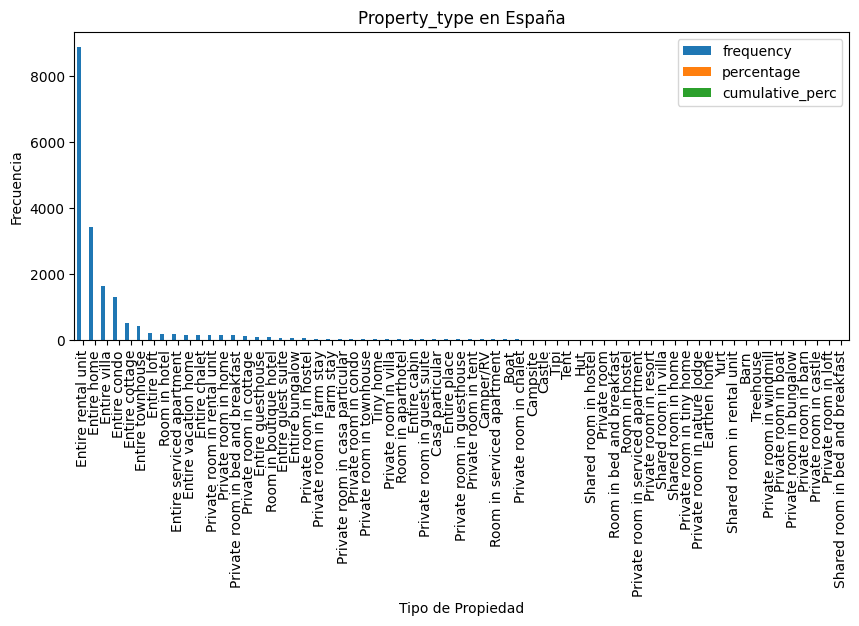

In [147]:
#Realizamos grafico de barras del dataframe filtrado
Filtro1_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Property_type en España')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

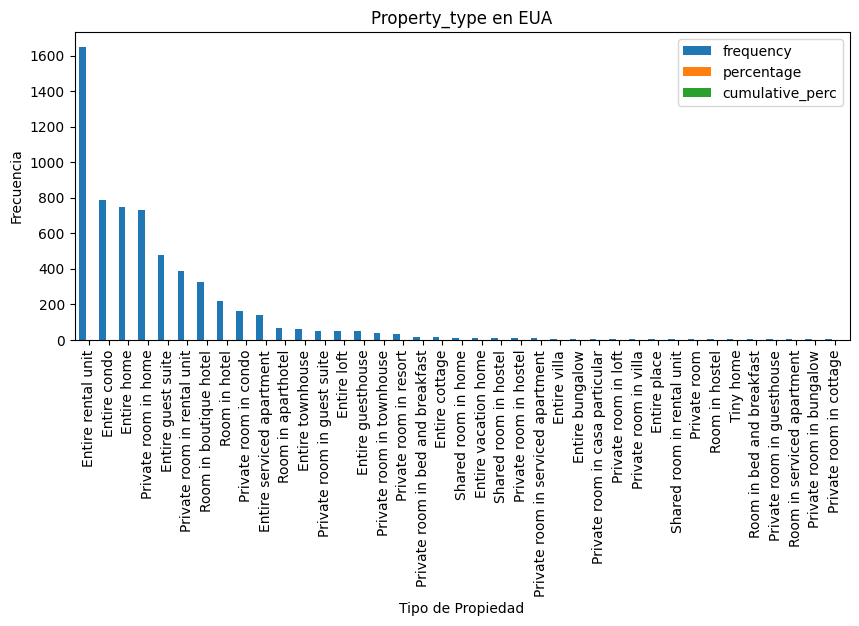

In [148]:
#Realizamos grafico de barras del dataframe filtrado
Filtro2_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Property_type en EUA')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

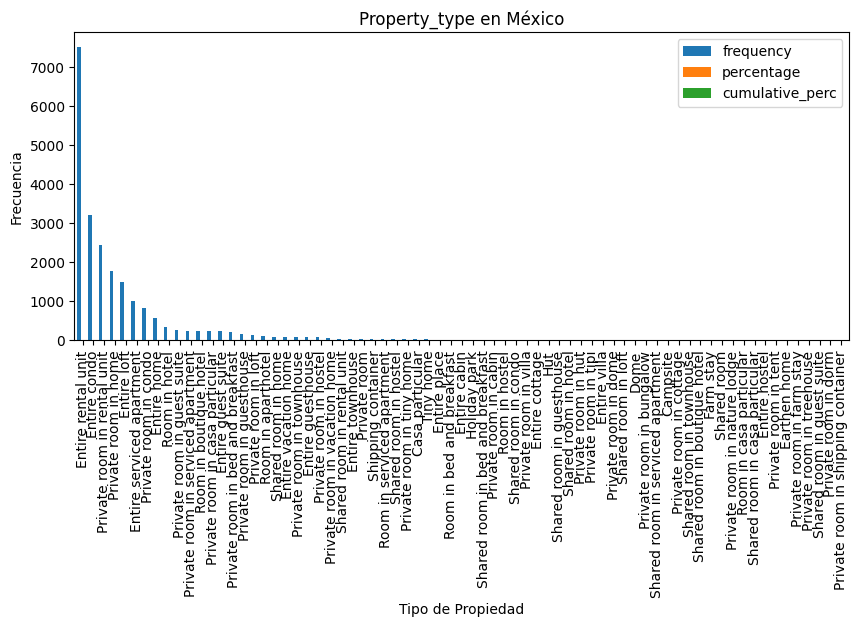

In [149]:
#Realizamos grafico de barras del dataframe filtrado
Filtro3_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Property_type en México')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Frecuencia')

Análisis: Al observar las gráficas de la variable "tipo de propiedades" se puede analizar que en España Entire Rental Unit es el tipo de propiedad con mayor presencia, seguido por Entire home, Entire condo y Entire cotage. De ahí, existe un zesgo bastante pronunciado pues la presencia de las categorías restantes cuenta con valores menores a 1000 en frecuencia. Para el caso de EUA, las frecuencias están más disperas en el tipo de vivienda teniendo como respuestas más populares Entire rental unit, Entire condo, Entire home y Private room in home. Por último, para el caso de México, muy parecido a los datos de España cuenta con un zesgo muy marcado dentr de las respestas registradas, teniendo como respuesta más popular Entire rental unit, Entire condo, Private room in rental unit y Private room in home.  

##host_identity_verified

In [150]:
#Obtengo un análisis univariado de una variable categórica en específico
table4= freq_tbl(df_españa_concat_2['host_identity_verified'])
table5= freq_tbl(df_eua_concat_2['host_identity_verified'])
table6= freq_tbl(df_mex_concat_2['host_identity_verified'])
table4

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,16621,0.898335,0.898335
1,f,1881,0.101665,1.000000


In [151]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro4= table4[table4['frequency']>1]
Filtro5= table5[table5['frequency']>1]
Filtro6= table6[table6['frequency']>1]
display(Filtro4,Filtro5,Filtro6)

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,16621,0.898335,0.898335
1,f,1881,0.101665,1.000000


,host_identity_verified,frequency,percentage,cumulative_perc
0,t,5456,0.889324,0.889324
1,f,679,0.110676,1.000000


,host_identity_verified,frequency,percentage,cumulative_perc
0,t,20870,0.940895,0.940895
1,f,1311,0.059105,1.000000


In [152]:
#Ajusto el indice de mi dataframe
Filtro4_index= Filtro4.set_index('host_identity_verified')
Filtro5_index= Filtro5.set_index('host_identity_verified')
Filtro6_index= Filtro6.set_index('host_identity_verified')

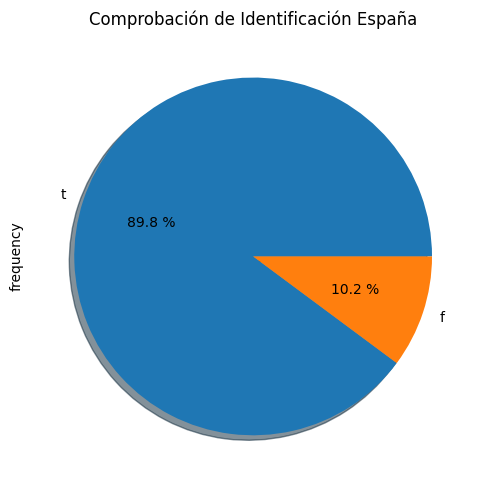

In [153]:
#Realizamos grafico de pastel del dataframe filtrado

Filtro4_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Comprobación de Identificación España')
plt.tight_layout()


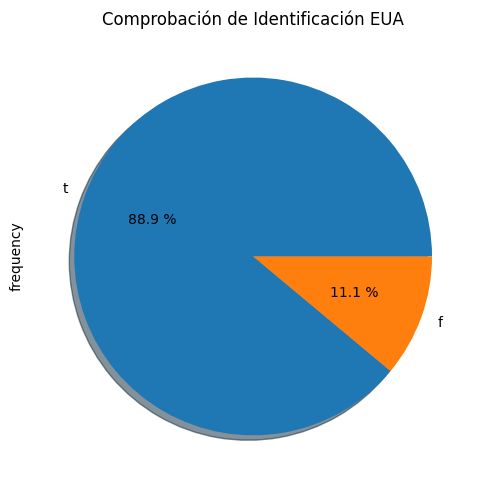

In [154]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro5_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Comprobación de Identificación EUA')
plt.tight_layout()

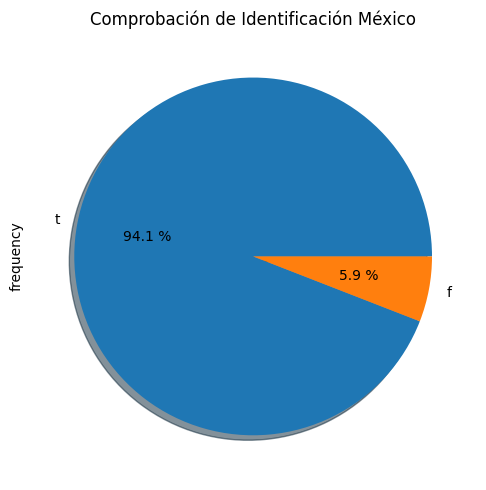

In [155]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro6_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Comprobación de Identificación México')
plt.tight_layout()

Análisis: En cuanto a la variable de comprobación de identidad, del 100% de las respuesta sregistradas España contó con 10.2% de aquellos que no relizaron dicha verificación, EUA 11.1% que no lo realizó, y México 5.9% que no lo realizó. México fue el país con el mayor porcentaje de participación positiva. 

##host_response_time

In [156]:
#Obtengo un análisis univariado de una variable categórica en específico
table7= freq_tbl(df_españa_concat_2['host_response_time'])
table8= freq_tbl(df_eua_concat_2['host_response_time'])
table9= freq_tbl(df_mex_concat_2['host_response_time'])
table7

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,12195,0.659118,0.659118
1,within a few hours,2651,0.143282,0.802400
2,within a day,2124,0.114798,0.917198
3,omitido,1207,0.065236,0.982434
4,a few days or more,325,0.017566,1.000000


In [157]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro7= table7[table7['frequency']>1]
Filtro8= table8[table8['frequency']>1]
Filtro9= table9[table9['frequency']>1]
display(Filtro7,Filtro8,Filtro9)

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,12195,0.659118,0.659118
1,within a few hours,2651,0.143282,0.802400
2,within a day,2124,0.114798,0.917198
3,omitido,1207,0.065236,0.982434
4,a few days or more,325,0.017566,1.000000


,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,4202,0.684923,0.684923
1,within a few hours,1094,0.178321,0.863244
2,within a day,424,0.069112,0.932355
3,omitido,362,0.059006,0.991361
4,a few days or more,53,0.008639,1.000000


,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,16934,0.763446,0.763446
1,within a few hours,1866,0.084126,0.847572
2,omitido,1503,0.067761,0.915333
3,within a day,1342,0.060502,0.975835
4,a few days or more,536,0.024165,1.000000


In [158]:
#Ajusto el indice de mi dataframe
Filtro7_index= Filtro7.set_index('host_response_time')
Filtro8_index= Filtro8.set_index('host_response_time')
Filtro9_index= Filtro9.set_index('host_response_time')

Text(0.5, 1.0, 'Tiempo respuesta host España')

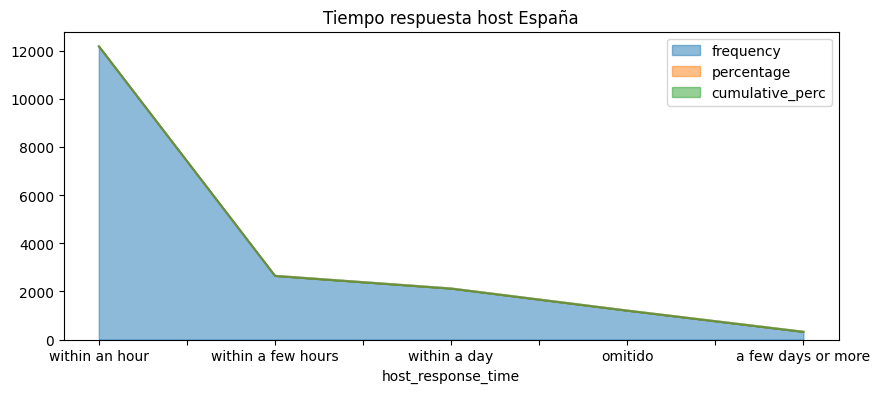

In [159]:
#Realizamos grafico de área del dataframe filtrado
Filtro7_index.plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.title('Tiempo respuesta host España')

Text(0.5, 1.0, 'Tiempo respuesta host EUA')

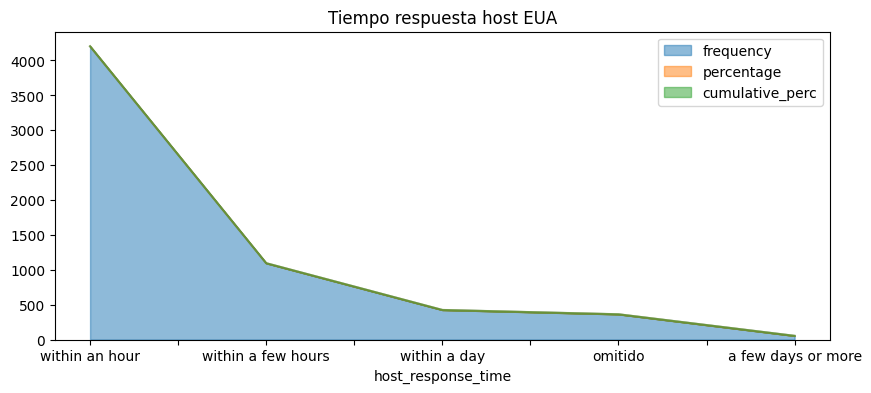

In [160]:
#Realizamos grafico de área del dataframe filtrado
Filtro8_index.plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.title('Tiempo respuesta host EUA')

Text(0.5, 1.0, 'Tiempo respuesta host México')

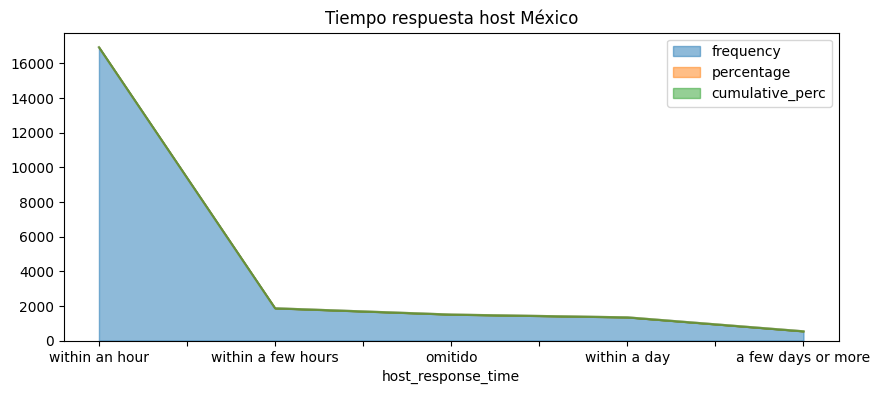

In [161]:
#Realizamos grafico de área del dataframe filtrado
Filtro9_index.plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.title('Tiempo respuesta host México')

Análisis: En cuanto al tiempo de respuesta del host en España, con una presencia de 12000 respuestas el rango de "dentro de una hora" fue la respuesta más popular, en EUA esa misma respuesta fue la más popular pero tuvo una frecuencia menor llegando a las 4000 respuestas registradas y por último México también tuvo esa respuesta como más popular con un registro de más de 16000 registros. Para los tres países la segunda respuesta más registrada fue "dentro d eun par de horas". 

##review_scores_value

In [162]:
#Obtengo un análisis univariado de una variable categórica en específico
table10= freq_tbl(df_españa_concat_2['review_scores_value'])
#table8= freq_tbl(df_eua_concat_2['host_response_time'])
#table9= freq_tbl(df_mex_concat_2['host_response_time'])
table10

'No categorical variables to analyze.'

In [163]:
# Crea una lista de los límites de los intervalos para los rangos
limites = [0, 2.5, 3.5, 4.5, 5]

# Crea una lista de las etiquetas para los rangos
etiquetas = ['Bajo', 'Medio Bajo', 'Medio Alto', 'Alto']
# Define una paleta de colores con tonos de verdes oscuros, morados y azules
colores = ['#5E8F5A', '#8F8F5A', '#5E5A8F', '#5A8F8F', '#8F5A8F', '#5A8F5E']

# Crea una nueva columna en el dataframe con los rangos categóricos
df_españa_concat_2['rangos'] = pd.cut(df_españa_concat_2['review_scores_value'], bins=limites, labels=etiquetas)
df_eua_concat_2['rangos'] = pd.cut(df_eua_concat_2['review_scores_value'], bins=limites, labels=etiquetas)
df_mex_concat_2['rangos'] = pd.cut(df_mex_concat_2['review_scores_value'], bins=limites, labels=etiquetas)
# Agrupa los datos por rangos y cuenta cuántas veces aparece cada rango
datos_por_rango_esp = df_españa_concat_2.groupby('rangos').size()
datos_por_rango_eua = df_eua_concat_2.groupby('rangos').size()
datos_por_rango_mex = df_mex_concat_2.groupby('rangos').size()


<ipython-input-163-aa9b818c0450>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_españa_concat_2['rangos'] = pd.cut(df_españa_concat_2['review_scores_value'], bins=limites, labels=etiquetas)
<ipython-input-163-aa9b818c0450>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eua_concat_2['rangos'] = pd.cut(df_eua_concat_2['review_scores_value'], bins=limites, labels=etiquetas)
<ipython-input-163-aa9b818c0450>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

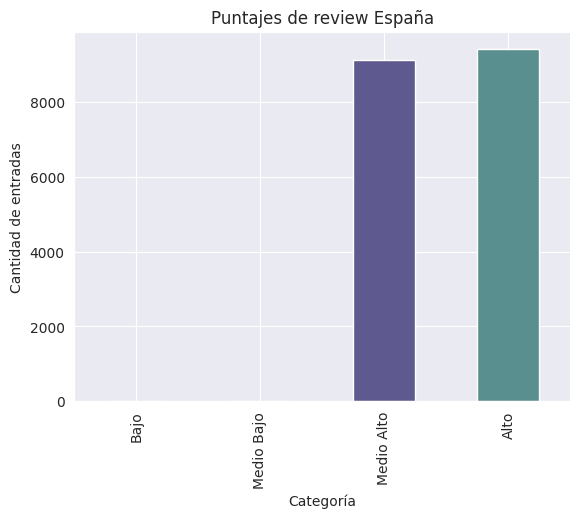

In [164]:
# Crea un gráfico de barras para visualizar los datos por rango
sns.set_style("darkgrid")
datos_por_rango_esp.plot(kind='bar', stacked=True, color=colores)
plt.title('Puntajes de review España')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de entradas')
plt.show()

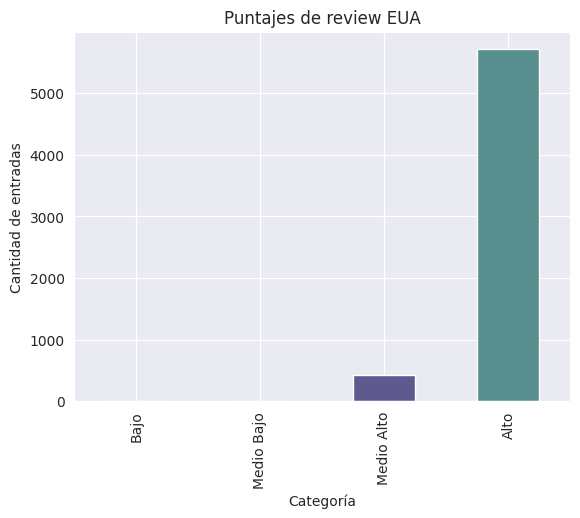

In [165]:
# Crea un gráfico de barras para visualizar los datos por rango
sns.set_style("darkgrid")
datos_por_rango_eua.plot(kind='bar', stacked=True, color=colores)
plt.title('Puntajes de review EUA')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de entradas')
plt.show()

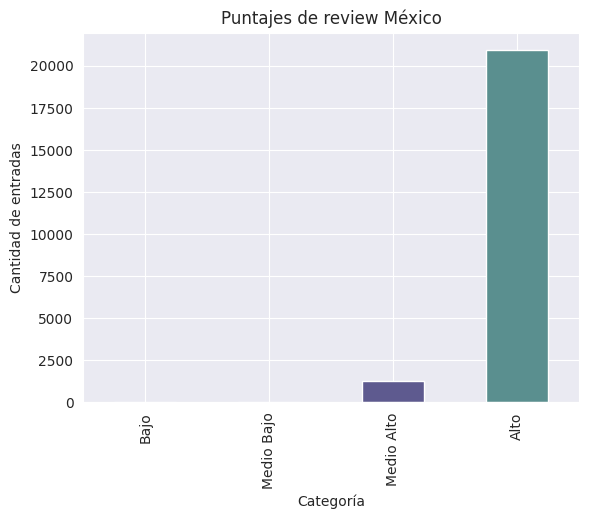

In [166]:
# Crea un gráfico de barras para visualizar los datos por rango
sns.set_style("darkgrid")
datos_por_rango_mex.plot(kind='bar', stacked=True, color=colores)
plt.title('Puntajes de review México')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de entradas')
plt.show()

Análisis: Dentro del análisis para la variable "Puntajes de review" para cada país, se crearon categorías correspondientes al registro de respuestas para facilitar el entendimiento de los datos. La mayoría de los puntajes registrados corresponden a la categoría "Alto". Par España Alto registró un poco más de 9000 votos mientras que la categoría "Medio Alto" registró apenas los 9000 votos. Para EUA la categoría "Alto" tuvo presencia en casi 6000 registros mientras que "medio alto" apenas tuvo 500 registros. Por último, México contó como respuesta más popular el puntaje de "Alto" con más de 20000 registros seguido por "medio alto" con al rededor de apenas 100 votos. Ningún país tuvo registros significantes en las categorías de puntaje "Bajo" o "medio bajo" 


##review_scores_communication

In [167]:
#Obtengo un análisis univariado de una variable categórica en específico
table13= freq_tbl(df_españa_concat_2['review_scores_communication'])
#table8= freq_tbl(df_eua_concat_2['host_response_time'])
#table9= freq_tbl(df_mex_concat_2['host_response_time'])
table13

'No categorical variables to analyze.'

In [168]:
import seaborn as sns
# Crea una lista de los límites de los intervalos para los rangos
limites = [0, 2.5, 3.5, 4.5, 5]

# Crea una lista de las etiquetas para los rangos
etiquetas = ['Bajo', 'Medio Bajo', 'Medio Alto', 'Alto']

# Define una paleta de colores con tonos de verdes oscuros, morados y azules
colores = ['#1F2C56', '#364156', '#4D4F56', '#8F5A5A', '#5A5E8F', '#8F5E5A', '#5E8F5A', '#8F8F5A', '#5E5A8F', '#5A8F8F', '#8F5A8F', '#5A8F5E']


# Crea una nueva columna en el dataframe con los rangos categóricos
df_españa_concat_2['rangos'] = pd.cut(df_españa_concat_2['review_scores_communication'], bins=limites, labels=etiquetas)
df_eua_concat_2['rangos'] = pd.cut(df_eua_concat_2['review_scores_communication'], bins=limites, labels=etiquetas)
df_mex_concat_2['rangos'] = pd.cut(df_mex_concat_2['review_scores_communication'], bins=limites, labels=etiquetas)
# Agrupa los datos por rangos y cuenta cuántas veces aparece cada rango
datos_por_rango_esp = df_españa_concat_2.groupby('rangos').size()
datos_por_rango_eua = df_eua_concat_2.groupby('rangos').size()
datos_por_rango_mex = df_mex_concat_2.groupby('rangos').size()


<ipython-input-168-a450fb4b3512>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_españa_concat_2['rangos'] = pd.cut(df_españa_concat_2['review_scores_communication'], bins=limites, labels=etiquetas)
<ipython-input-168-a450fb4b3512>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eua_concat_2['rangos'] = pd.cut(df_eua_concat_2['review_scores_communication'], bins=limites, labels=etiquetas)
<ipython-input-168-a450fb4b3512>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

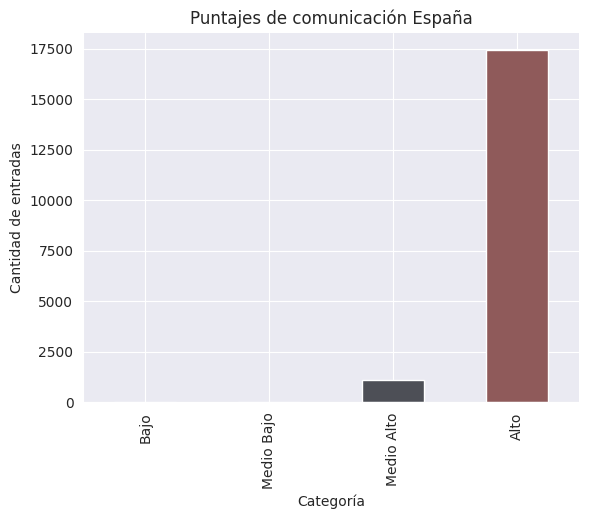

In [169]:
# Crea un gráfico de barras para visualizar los datos por rango
sns.set_style("darkgrid") #style must be one of white, dark, whitegrid, darkgrid, ticks
datos_por_rango_esp.plot(kind='bar', stacked=True, color=colores)
# Establecer el color de fondo
plt.title('Puntajes de comunicación España')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de entradas')
sns.despine()
sns.set(rc={'figure.facecolor':'#F4F4F4', 'axes.facecolor':'#F4F4F4'})

plt.show()

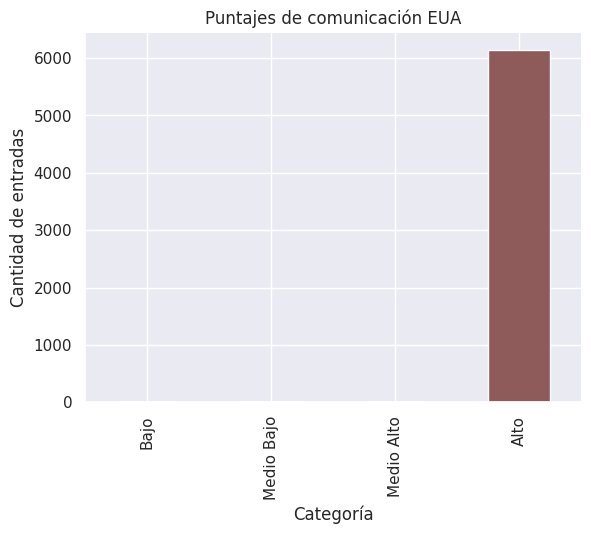

In [170]:
# Crea un gráfico de barras para visualizar los datos por rango
sns.set_style("darkgrid") #style must be one of white, dark, whitegrid, darkgrid, ticks
datos_por_rango_eua.plot(kind='bar', stacked=True, color=colores)
# Establecer el color de fondo
plt.title('Puntajes de comunicación EUA')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de entradas')
sns.despine()
sns.set(rc={'figure.facecolor':'#F4F4F4', 'axes.facecolor':'#F4F4F4'})

plt.show()

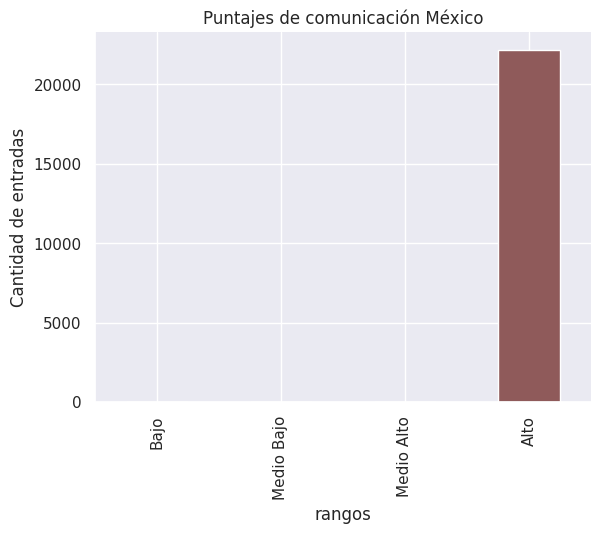

In [171]:
# Crea un gráfico de barras para visualizar los datos por rango
sns.set_style("darkgrid") #style must be one of white, dark, whitegrid, darkgrid, ticks
datos_por_rango_mex.plot(kind='bar', stacked=True, color=colores)
# Establecer el color de fondo
plt.title("Puntajes de comunicación México")
plt.ylabel('Cantidad de entradas')
sns.despine()
sns.set(rc={'figure.facecolor':'#F4F4F4', 'axes.facecolor':'#F4F4F4'})

plt.show()

Análisis: El puntaje del rating para calificar la comunicación con el host en el caso de España el rango de "Alto" obtuvó la mayor parte de registros seguido por "Medio alto" que obtuvo apenas registros significantes para aperecer en la gráfica. De ahí, el caso de EUA y México, todas las respuestas se encontraron dentro del rango "Alto" lo que habla de una excelente comunicación por parte de los host de cada país, sin registros aparentes en las otras categorías.  